In [1]:
from preprocess import *
from c_models import *
from autoencoder_models import *

In [2]:
import keras
from keras import layers
from keras import regularizers
import tensorflow as tf

In [3]:
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy import stats
import os
import math

download the file from https://figshare.com/collections/A_large_electroencephalographic_motor_imagery_dataset_for_electroencephalographic_brain_computer_interfaces/3917698

# Input

In [4]:
file_name_1 = "CLA-SubjectJ-170504-3St-LRHand-Inter"
file_name_2 = "CLA-SubjectJ-170508-3St-LRHand-Inter"
file_name_3 = "CLA-SubjectJ-170510-3St-LRHand-Inter"

In [5]:
f1 = "rawData/" + file_name_1 + ".mat"
f2 = "rawData/" + file_name_2 + ".mat"
f3 = "rawData/" + file_name_3 + ".mat"

mat_1 = take_input(f1)
mat_2 = take_input(f2)
mat_3 = take_input(f3)
mat_1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 23 22:30:55 2018',
 '__version__': '1.0',
 '__globals__': [],
 'ans': array([[23.53949045]]),
 'o': array([[(array(['201705041304.32BEA9DD'], dtype='<U21'), array([], dtype='<U1'), array([[620168]], dtype=int32), array([[200]], dtype=uint8), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint8), array([[ 0],
        [ 0],
        [ 0],
        ...,
        [92],
        [92],
        [92]], dtype=uint8), array([[ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
        [ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
        [ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
        ...,
        [-92.4, -34.8, -14.4, ...,   8.4,   8.4,  -0. ],
        [-84. , -29.4, -16.2, ...,   7.2,  11.4,  -0.6],
        [-84.6, -31.2, -13.2, ...,   6.6,  12. ,  -0. ]]), array([[array(['Fp1'], dtype='<U3')],
        [array(['Fp2'], dtype='<U3')],
        [array(['F3'], dtype='<U

In [6]:
mat_1['o'][0][0].dtype

dtype([('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')])

In [7]:
idx = 4
markers_1 = get_markers(mat_1, idx) 
markers_2 = get_markers(mat_2, idx) 
markers_3 = get_markers(mat_3, idx) 

In [8]:
markers_1.shape

(620168,)

In [9]:
set(markers_1)

{0, 1, 2, 3}

In [10]:
markers_2.shape

(621892,)

In [11]:
markers_3.shape

(621884,)

In [12]:
import collections
collections.Counter(markers_1)

Counter({0: 467168, 3: 48280, 1: 49130, 2: 55590})

In [13]:
idx = 6
data_1 = get_data(mat_1, idx)
data_2 = get_data(mat_2, idx)
data_3 = get_data(mat_3, idx)

In [14]:
print("data1:",data_1.shape, " data2:",data_2.shape," data3:",data_3.shape)

data1: (620168, 21)  data2: (621892, 21)  data3: (621884, 21)


In [15]:
frame_of_11 = get_trial_frames(data_1, markers_1, 1)
frame_of_12 = get_trial_frames(data_1, markers_1, 2)
frame_of_13 = get_trial_frames(data_1, markers_1, 3)

frame_of_21 = get_trial_frames(data_2, markers_2, 1)
frame_of_22 = get_trial_frames(data_2, markers_2, 2)
frame_of_23 = get_trial_frames(data_2, markers_2, 3)

frame_of_31 = get_trial_frames(data_3, markers_3, 1)
frame_of_32 = get_trial_frames(data_3, markers_3, 2)
frame_of_33 = get_trial_frames(data_3, markers_3, 3)


In [16]:
print("11:",frame_of_11.shape, "21:", frame_of_21.shape, "31:", frame_of_31.shape)

11: (289, 21, 170) 21: (289, 21, 170) 31: (289, 21, 170)


In [17]:
print("12:",frame_of_12.shape, "22:", frame_of_22.shape, "32:", frame_of_32.shape)

12: (327, 21, 170) 22: (327, 21, 170) 32: (327, 21, 170)


In [18]:
print("13:",frame_of_13.shape, "23:", frame_of_23.shape, "33:", frame_of_33.shape)

13: (284, 21, 170) 23: (284, 21, 170) 33: (284, 21, 170)


In [19]:
frame_of_1 = np.concatenate((frame_of_11, frame_of_21, frame_of_31))
frame_of_2 = np.concatenate((frame_of_12, frame_of_22, frame_of_32))
frame_of_3 = np.concatenate((frame_of_13, frame_of_23, frame_of_33))

In [20]:
print("1:",frame_of_1.shape, "2:", frame_of_2.shape, "3:", frame_of_3.shape)

1: (867, 21, 170) 2: (981, 21, 170) 3: (852, 21, 170)


In [21]:
all_trials = np.concatenate((frame_of_1, frame_of_2, frame_of_3))
all_trials.shape

(2700, 21, 170)

In [22]:
normalised_trials = []
for trial in all_trials:
    a = minmax_scale(trial, feature_range= (0,1), axis=1)
    normalised_trials.append(a)
    
normalised_trials = np.array(normalised_trials)

In [23]:
normalised_trials.shape

(2700, 21, 170)

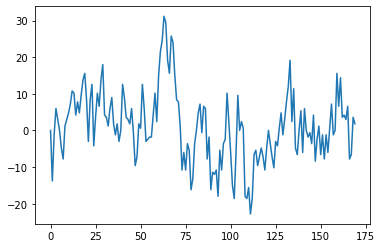

In [24]:
plt.plot(np.arange(170),all_trials[0][0])

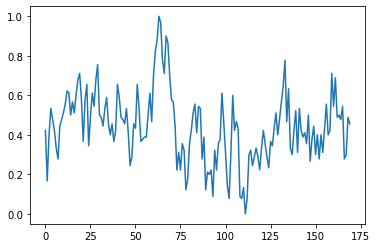

In [25]:
plt.plot(np.arange(170),normalised_trials[0][0])

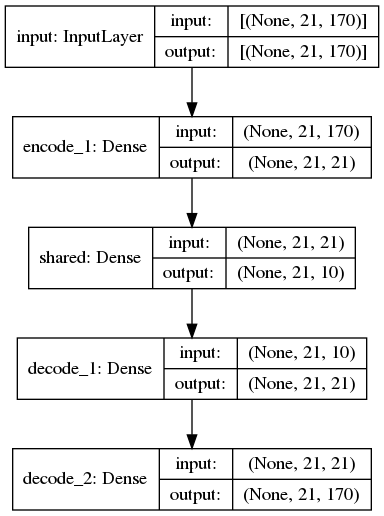

In [26]:
autoencoder_1, encoder_1 = model_1(170)
tf.keras.utils.plot_model(autoencoder_1, to_file="new_models/autoencoder_1.png", show_shapes=True)

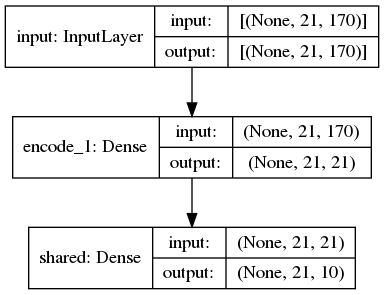

In [27]:
tf.keras.utils.plot_model(encoder_1, to_file="new_models/encoder_1.png", show_shapes=True)

In [28]:
autoencoder_1.summary()

Model: "autoencoder_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 21, 170)]         0         
_________________________________________________________________
encode_1 (Dense)             (None, 21, 21)            3591      
_________________________________________________________________
shared (Dense)               (None, 21, 10)            220       
_________________________________________________________________
decode_1 (Dense)             (None, 21, 21)            231       
_________________________________________________________________
decode_2 (Dense)             (None, 21, 170)           3740      
Total params: 7,782
Trainable params: 7,782
Non-trainable params: 0
_________________________________________________________________


In [29]:
encoder_1.summary()

Model: "encoder_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 21, 170)]         0         
_________________________________________________________________
encode_1 (Dense)             (None, 21, 21)            3591      
_________________________________________________________________
shared (Dense)               (None, 21, 10)            220       
Total params: 3,811
Trainable params: 3,811
Non-trainable params: 0
_________________________________________________________________


In [30]:
epoch = 3000
autoencoder_1, encoder_1, denoised_signal_1 = train_model(normalised_trials, autoencoder_1, encoder_1, epoch)

/home/suraj/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/3000
169/169 [==============================] - 17s 4ms/step - loss: 0.1752
Epoch 2/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1275
Epoch 3/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.1199
Epoch 4/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.1106
Epoch 5/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0939
Epoch 6/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0868
Epoch 7/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0860
Epoch 8/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0839
Epoch 9/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0826
Epoch 10/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0800
Epoch 11/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0723
Epoch 12/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0717


169/169 [==============================] - 1s 3ms/step - loss: 0.0376
Epoch 99/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0375
Epoch 100/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0375
Epoch 101/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0375
Epoch 102/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0376
Epoch 103/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0375
Epoch 104/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0375
Epoch 105/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0373
Epoch 106/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0361
Epoch 107/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0359
Epoch 108/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0360
Epoch 109/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0

169/169 [==============================] - 1s 3ms/step - loss: 0.0339
Epoch 195/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 196/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0339
Epoch 197/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0340
Epoch 198/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0341
Epoch 199/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0339
Epoch 200/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 201/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0339
Epoch 202/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 203/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 204/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 205/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.

169/169 [==============================] - 1s 3ms/step - loss: 0.0339
Epoch 291/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0339
Epoch 292/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0337
Epoch 293/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 294/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 295/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0340
Epoch 296/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0339
Epoch 297/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 298/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 299/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 300/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 301/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.

169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 387/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 388/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 389/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 390/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 391/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0338
Epoch 392/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0337
Epoch 393/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 394/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0326
Epoch 395/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0328
Epoch 396/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 397/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.

169/169 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 483/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 484/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0326
Epoch 485/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0326
Epoch 486/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 487/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0326
Epoch 488/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 489/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 490/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0327
Epoch 491/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0328
Epoch 492/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0326
Epoch 493/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 579/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 580/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 581/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 582/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 583/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 584/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 585/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 586/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 587/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0328
Epoch 588/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 589/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0328
Epoch 675/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 676/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 677/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0328
Epoch 678/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0328
Epoch 679/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 680/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 681/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 682/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 683/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 684/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 685/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 771/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0312
Epoch 772/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 773/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 774/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 775/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 776/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 777/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 778/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0311
Epoch 779/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 780/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 781/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 867/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 868/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 869/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 870/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 871/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 872/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 873/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 874/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 875/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 876/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 877/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 963/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 964/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 965/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 966/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 967/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 968/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 969/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 970/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 971/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 972/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 973/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1058/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1059/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1060/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1061/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1062/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1063/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 1064/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 1065/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 1066/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1067/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1068/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 1153/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 1154/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1155/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1156/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1157/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1158/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1159/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1160/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1161/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1162/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1163/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1248/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 1249/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1250/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1251/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1252/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1253/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1254/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1255/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1256/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1257/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1258/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 1343/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1344/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 1345/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1346/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0289
Epoch 1347/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1348/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0289
Epoch 1349/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1350/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1351/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1352/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1353/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 1438/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1439/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1440/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 1441/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 1442/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1443/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 1444/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1445/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1446/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1447/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1448/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 1533/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1534/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1535/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1536/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 1537/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1538/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 1539/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 1540/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1541/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 1542/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1543/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 1628/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1629/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1630/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1631/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1632/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 1633/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1634/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 1635/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1636/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0292
Epoch 1637/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0291
Epoch 1638/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 1723/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 1724/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 1725/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 1726/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 1727/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 1728/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 1729/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 1730/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 1731/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 1732/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 1733/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 1818/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1819/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 1820/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 1821/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1822/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 1823/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1824/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 1825/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1826/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 1827/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 1828/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 1913/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1914/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 1915/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 1916/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1917/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1918/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1919/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 1920/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1921/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 1922/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 1923/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2008/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2009/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2010/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2011/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2012/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2013/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2014/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2015/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2016/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2017/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2018/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0254
Epoch 2103/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0252
Epoch 2104/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2105/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2106/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2107/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2108/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2109/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2110/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2111/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2112/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2113/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2198/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2199/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2200/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2201/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2202/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2203/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2204/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2205/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2206/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2207/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2208/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2293/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2294/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2295/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2296/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2297/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2298/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2299/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2300/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2301/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2302/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2303/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2388/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2389/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0258
Epoch 2390/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2391/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2392/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2393/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2394/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2395/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2396/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2397/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2398/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2483/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2484/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2485/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2486/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2487/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2488/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2489/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2490/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2491/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 2492/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2493/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2578/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2579/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2580/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2581/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2582/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2583/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2584/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2585/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 2586/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 2587/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2588/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2673/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2674/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2675/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0257
Epoch 2676/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2677/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2678/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2679/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2680/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2681/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2682/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2683/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2768/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2769/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 2770/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2771/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2772/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2773/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2774/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2775/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2776/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2777/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2778/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2863/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 2864/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2865/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2866/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2867/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2868/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0254
Epoch 2869/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0253
Epoch 2870/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0253
Epoch 2871/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2872/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2873/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2958/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 2959/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2960/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 2961/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2962/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2963/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2964/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2965/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2966/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2967/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 2968/3000
169/169 [==============================] - 0s 3ms/step

In [31]:
autoencoder_1.save("new_models_1/autoencoder_1")
encoder_1.save("new_models_1/encoder_1")

INFO:tensorflow:Assets written to: new_models_1/autoencoder_1/assets
INFO:tensorflow:Assets written to: new_models_1/encoder_1/assets


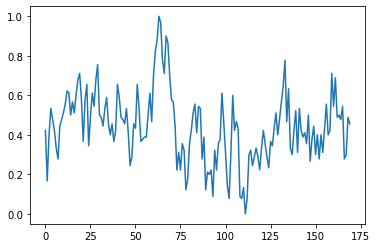

In [32]:
plt.plot(np.arange(170),normalised_trials[0][0])

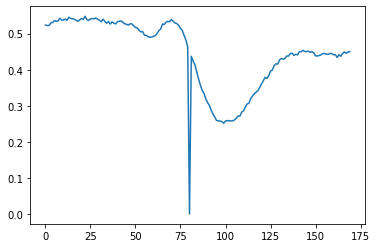

In [33]:
plt.plot(np.arange(170),denoised_signal_1[0][0])

In [34]:
features_1 = gen_features(normalised_trials, encoder_1)

In [35]:
features_1.shape

(2700, 210)

In [36]:
n_1 = frame_of_1.shape[0]
n_2 = frame_of_2.shape[0]
n_3 = frame_of_3.shape[0]
dataset_1 = gen_dataset(features_1, n_1, n_2, n_3)

In [41]:
dataset_1

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,label
0,0.143784,0.0,0.130178,0.0,0.108520,0.126959,0.132470,0.042882,0.107243,0.107146,...,0.0,0.117015,0.0,0.112284,0.092270,0.156302,0.057625,0.130734,0.114201,1
1,0.210229,0.0,0.092473,0.0,0.113270,0.133212,0.180708,0.035934,0.105229,0.137119,...,0.0,0.127973,0.0,0.120426,0.055446,0.127142,0.111103,0.185363,0.055431,1
2,0.155790,0.0,0.160593,0.0,0.132029,0.118505,0.192702,0.037088,0.092646,0.125960,...,0.0,0.147522,0.0,0.084433,0.056695,0.188334,0.109179,0.110059,0.050077,1
3,0.153953,0.0,0.126559,0.0,0.087911,0.098096,0.123757,0.076528,0.118633,0.070135,...,0.0,0.110318,0.0,0.063461,0.062903,0.090573,0.083040,0.135260,0.069752,1
4,0.208670,0.0,0.113370,0.0,0.108702,0.120404,0.243239,0.059799,0.078850,0.114692,...,0.0,0.131814,0.0,0.108642,0.051930,0.123104,0.096925,0.168841,0.069411,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.209340,0.0,0.117303,0.0,0.103519,0.082944,0.143182,0.062734,0.133558,0.106581,...,0.0,0.125930,0.0,0.098855,0.071043,0.177037,0.076456,0.121112,0.095934,3
2696,0.177206,0.0,0.126307,0.0,0.094426,0.108652,0.182976,0.040894,0.081149,0.124159,...,0.0,0.127426,0.0,0.139568,0.157727,0.204705,0.043293,0.095603,0.116685,3
2697,0.183694,0.0,0.134664,0.0,0.104317,0.088784,0.137040,0.038339,0.115593,0.128203,...,0.0,0.116053,0.0,0.107887,0.081016,0.231895,0.115651,0.122918,0.057422,3
2698,0.175742,0.0,0.133229,0.0,0.141432,0.126158,0.149971,0.042199,0.132994,0.120924,...,0.0,0.116072,0.0,0.097142,0.115896,0.174967,0.064083,0.098253,0.094118,3


In [43]:
dataset_1.to_csv("csvDatasets/autoencoder_dataset.csv")

In [37]:
X_train, y_train, X_test, y_test = get_train_test(dataset_1)

In [38]:
results_model_1 = evaluate_models(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [39]:
results_model_1

,Model,Train_accuracy,Test_accuracy
0,SVM,0.899,0.865
1,Decision Tree,0.701,0.615
2,Random forest,1.0,0.807
3,AdaBoost,0.869,0.789
4,Bagging,0.994,0.752
5,GaussianNB,0.688,0.711
6,BernoulliNB,0.434,0.404
7,MLP,0.893,0.863
8,QDA,0.639,0.487
9,KNN,0.85,0.717


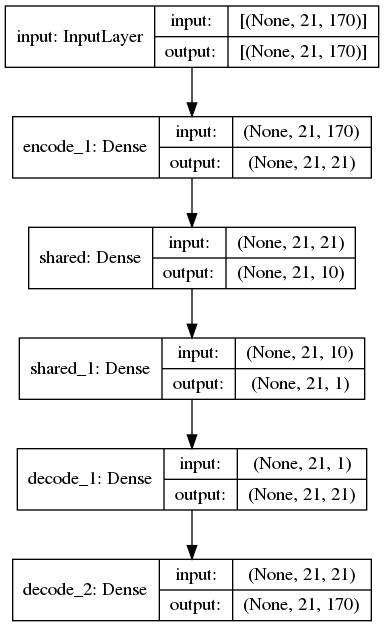

In [44]:
autoencoder_2, encoder_2 = model_2(170)
tf.keras.utils.plot_model(autoencoder_2, to_file="new_models/autoencoder_2.png", show_shapes=True)

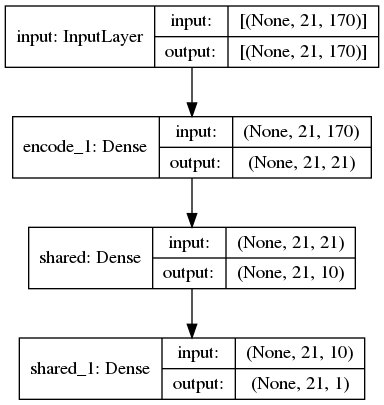

In [45]:
tf.keras.utils.plot_model(encoder_2, to_file="new_models/encoder_2.png", show_shapes=True)

In [46]:
autoencoder_2.summary()

Model: "autoencoder_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 21, 170)]         0         
_________________________________________________________________
encode_1 (Dense)             (None, 21, 21)            3591      
_________________________________________________________________
shared (Dense)               (None, 21, 10)            220       
_________________________________________________________________
shared_1 (Dense)             (None, 21, 1)             11        
_________________________________________________________________
decode_1 (Dense)             (None, 21, 21)            42        
_________________________________________________________________
decode_2 (Dense)             (None, 21, 170)           3740      
Total params: 7,604
Trainable params: 7,604
Non-trainable params: 0
___________________________________________________

In [47]:
encoder_2.summary()

Model: "encoder_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 21, 170)]         0         
_________________________________________________________________
encode_1 (Dense)             (None, 21, 21)            3591      
_________________________________________________________________
shared (Dense)               (None, 21, 10)            220       
_________________________________________________________________
shared_1 (Dense)             (None, 21, 1)             11        
Total params: 3,822
Trainable params: 3,822
Non-trainable params: 0
_________________________________________________________________


In [48]:
epoch = 3000
autoencoder_2, encoder_2, denoised_signal_2 = train_model(normalised_trials, autoencoder_2, encoder_2, epoch)

/home/suraj/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/3000
169/169 [==============================] - 20s 5ms/step - loss: 0.1857
Epoch 2/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.1513
Epoch 3/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1478
Epoch 4/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1474
Epoch 5/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1444
Epoch 6/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1383
Epoch 7/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1328
Epoch 8/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1296
Epoch 9/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1244
Epoch 10/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1234
Epoch 11/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1224
Epoch 12/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.1210


169/169 [==============================] - 1s 4ms/step - loss: 0.0807
Epoch 99/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0808
Epoch 100/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0808
Epoch 101/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0811
Epoch 102/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0809
Epoch 103/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0809
Epoch 104/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0808
Epoch 105/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0810
Epoch 106/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0809
Epoch 107/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0807
Epoch 108/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0808
Epoch 109/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0

169/169 [==============================] - 1s 4ms/step - loss: 0.0775
Epoch 195/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0774
Epoch 196/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0774
Epoch 197/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0773
Epoch 198/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0775
Epoch 199/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0777
Epoch 200/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0774
Epoch 201/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0773
Epoch 202/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0773
Epoch 203/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0775
Epoch 204/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0775
Epoch 205/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.

169/169 [==============================] - 1s 4ms/step - loss: 0.0744
Epoch 291/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0742
Epoch 292/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0741
Epoch 293/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0742
Epoch 294/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0743
Epoch 295/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0741
Epoch 296/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0742
Epoch 297/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0741
Epoch 298/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0742
Epoch 299/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0741
Epoch 300/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0742
Epoch 301/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 387/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 388/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0697
Epoch 389/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0696
Epoch 390/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0696
Epoch 391/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0698
Epoch 392/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0696
Epoch 393/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 394/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0698
Epoch 395/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0698
Epoch 396/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0697
Epoch 397/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0699
Epoch 483/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 484/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 485/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0696
Epoch 486/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 487/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0697
Epoch 488/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0698
Epoch 489/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0695
Epoch 490/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0697
Epoch 491/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0697
Epoch 492/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0695
Epoch 493/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 579/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 580/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 581/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 582/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 583/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 584/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 585/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 586/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 587/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 588/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0685
Epoch 589/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 675/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 676/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0685
Epoch 677/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 678/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 679/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0685
Epoch 680/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0685
Epoch 681/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 682/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0685
Epoch 683/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 684/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 685/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 771/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 772/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0686
Epoch 773/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 774/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 775/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0681
Epoch 776/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 777/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0670
Epoch 778/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0669
Epoch 779/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0669
Epoch 780/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0670
Epoch 781/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 867/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 868/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 869/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 870/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 871/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 872/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 873/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 874/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0653
Epoch 875/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 876/3000
169/169 [==============================] - 2s 10ms/step - loss: 0.0652
Epoch 877/3000
169/169 [==============================] - 1s 4ms/step - loss: 0

169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 963/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 964/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 965/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 966/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0649
Epoch 967/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 968/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 969/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 970/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 971/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 972/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 973/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.

169/169 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 1058/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 1059/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 1060/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 1061/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 1062/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 1063/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 1064/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 1065/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 1066/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1067/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1068/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1153/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0652
Epoch 1154/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0651
Epoch 1155/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1156/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0650
Epoch 1157/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0651
Epoch 1158/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0653
Epoch 1159/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0653
Epoch 1160/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1161/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1162/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1163/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1248/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1249/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0653
Epoch 1250/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1251/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0653
Epoch 1252/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1253/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1254/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1255/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1256/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1257/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1258/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0653
Epoch 1343/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1344/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1345/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1346/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1347/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1348/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1349/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1350/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1351/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1352/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1353/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1438/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1439/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1440/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1441/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1442/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1443/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1444/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1445/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1446/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1447/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1448/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1533/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0653
Epoch 1534/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1535/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1536/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1537/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1538/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1539/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1540/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0653
Epoch 1541/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1542/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1543/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 4ms/step - loss: 0.0653
Epoch 1628/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1629/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0654
Epoch 1630/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0650
Epoch 1631/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0651
Epoch 1632/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1633/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0653
Epoch 1634/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0652
Epoch 1635/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0652
Epoch 1636/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0651
Epoch 1637/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0653
Epoch 1638/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 4ms/step - loss: 0.0623
Epoch 1723/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0622
Epoch 1724/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0621
Epoch 1725/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0620
Epoch 1726/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1727/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1728/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1729/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 1730/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 1731/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 1732/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0623
Epoch 1733/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0624
Epoch 1818/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0623
Epoch 1819/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 1820/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0623
Epoch 1821/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0623
Epoch 1822/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1823/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0620
Epoch 1824/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 1825/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 1826/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1827/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1828/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 1913/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0623
Epoch 1914/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1915/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 1916/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1917/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0623
Epoch 1918/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1919/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0622
Epoch 1920/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0621
Epoch 1921/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0621
Epoch 1922/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0621
Epoch 1923/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2008/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2009/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2010/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2011/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0613
Epoch 2012/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2013/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2014/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2015/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2016/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2017/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2018/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2103/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2104/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2105/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2106/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2107/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2108/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2109/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2110/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2111/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2112/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2113/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 4ms/step - loss: 0.0611
Epoch 2198/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2199/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2200/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2201/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2202/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2203/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2204/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2205/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2206/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2207/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2208/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2293/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2294/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0613
Epoch 2295/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2296/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2297/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2298/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2299/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0613
Epoch 2300/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2301/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0613
Epoch 2302/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2303/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2388/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2389/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2390/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2391/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2392/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2393/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2394/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2395/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2396/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2397/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2398/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2483/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2484/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2485/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2486/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2487/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2488/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2489/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2490/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2491/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0610
Epoch 2492/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2493/3000
169/169 [==============================] - 1s 3ms/step

169/169 [==============================] - 0s 3ms/step - loss: 0.0612
Epoch 2578/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0609
Epoch 2579/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0611
Epoch 2580/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 2581/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0611
Epoch 2582/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 2583/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 2584/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 2585/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 2586/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0611
Epoch 2587/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0609
Epoch 2588/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 1s 4ms/step - loss: 0.0611
Epoch 2673/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0610
Epoch 2674/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0611
Epoch 2675/3000
169/169 [==============================] - 1s 6ms/step - loss: 0.0611
Epoch 2676/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0611
Epoch 2677/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0610
Epoch 2678/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0611
Epoch 2679/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0610
Epoch 2680/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0609
Epoch 2681/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0612
Epoch 2682/3000
169/169 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 2683/3000
169/169 [==============================] - 0s 3ms/step

169/169 [==============================] - 1s 8ms/step - loss: 0.0611
Epoch 2768/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0611
Epoch 2769/3000
169/169 [==============================] - 1s 7ms/step - loss: 0.0610
Epoch 2770/3000
169/169 [==============================] - 1s 8ms/step - loss: 0.0611
Epoch 2771/3000
169/169 [==============================] - 1s 7ms/step - loss: 0.0611
Epoch 2772/3000
169/169 [==============================] - 1s 7ms/step - loss: 0.0610
Epoch 2773/3000
169/169 [==============================] - 1s 7ms/step - loss: 0.0611
Epoch 2774/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0611
Epoch 2775/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0608
Epoch 2776/3000
169/169 [==============================] - 1s 7ms/step - loss: 0.0611
Epoch 2777/3000
169/169 [==============================] - 1s 7ms/step - loss: 0.0609
Epoch 2778/3000
169/169 [==============================] - 1s 4ms/step

169/169 [==============================] - 1s 4ms/step - loss: 0.0611
Epoch 2863/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0610
Epoch 2864/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2865/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0611
Epoch 2866/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2867/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0610
Epoch 2868/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2869/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0611
Epoch 2870/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0609
Epoch 2871/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0611
Epoch 2872/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0610
Epoch 2873/3000
169/169 [==============================] - 1s 4ms/step

169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2958/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0612
Epoch 2959/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2960/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0609
Epoch 2961/3000
169/169 [==============================] - 1s 3ms/step - loss: 0.0611
Epoch 2962/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0612
Epoch 2963/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0611
Epoch 2964/3000
169/169 [==============================] - 1s 4ms/step - loss: 0.0612
Epoch 2965/3000
169/169 [==============================] - 1s 6ms/step - loss: 0.0611
Epoch 2966/3000
169/169 [==============================] - 1s 5ms/step - loss: 0.0612
Epoch 2967/3000
169/169 [==============================] - 1s 6ms/step - loss: 0.0611
Epoch 2968/3000
169/169 [==============================] - 1s 4ms/step

In [49]:
autoencoder_2.save("new_models_1/autoencoder_2")
encoder_2.save("new_models_1/encoder_2")

INFO:tensorflow:Assets written to: new_models_1/autoencoder_2/assets
INFO:tensorflow:Assets written to: new_models_1/encoder_2/assets


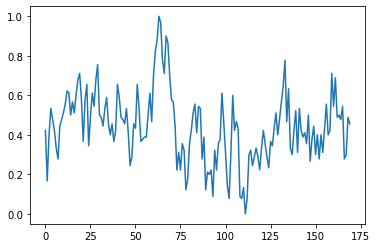

In [50]:
plt.plot(np.arange(170),normalised_trials[0][0])

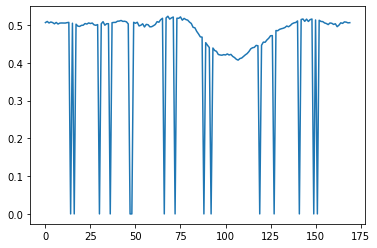

In [51]:
plt.plot(np.arange(170),denoised_signal_2[0][0])

In [52]:
features_2 = gen_features(normalised_trials, encoder_2)

In [53]:
features_2.shape

(2700, 21)

In [54]:
dataset_2 = gen_dataset(features_2, n_1, n_2, n_3)

In [55]:
dataset_2.to_csv("csvDatasets/autoencoder_dataset_2.csv")

In [56]:
X_train_2, y_train_2, X_test_2, y_test_2 = get_train_test(dataset_2)

In [57]:
results_model_2 = evaluate_models(X_train_2, y_train_2, X_test_2, y_test_2)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
results_model_2

,Model,Train_accuracy,Test_accuracy
0,SVM,0.663,0.535
1,Decision Tree,0.569,0.502
2,Random forest,1.0,0.524
3,AdaBoost,0.626,0.5
4,Bagging,0.986,0.465
5,GaussianNB,0.512,0.506
6,BernoulliNB,0.4,0.38
7,MLP,0.597,0.539
8,QDA,0.637,0.513
9,KNN,0.71,0.5


In [59]:
results_model_1.to_csv("results/results_model_1.csv")
results_model_2.to_csv("results/results_model_2.csv")

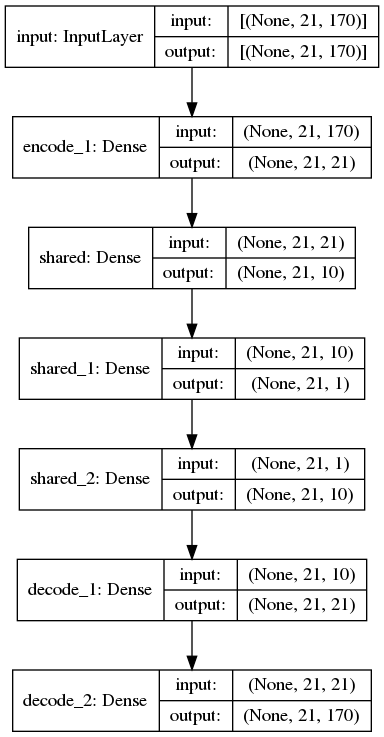

In [49]:
autoencoder_12, encoder_12 = model_12(170)
tf.keras.utils.plot_model(autoencoder_12, to_file="new_models/autoencoder_12.png", show_shapes=True)

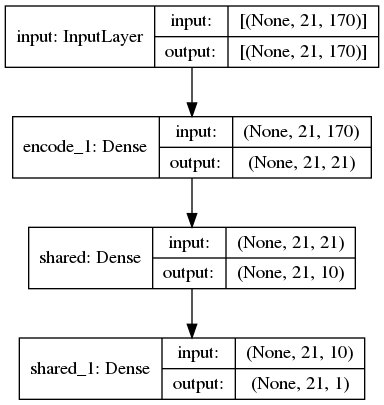

In [50]:
tf.keras.utils.plot_model(encoder_2, to_file="new_models/encoder_2.png", show_shapes=True)

In [51]:
autoencoder_2.summary()

Model: "autoencoder_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 21, 170)]         0         
_________________________________________________________________
encode_1 (Dense)             (None, 21, 21)            3591      
_________________________________________________________________
shared (Dense)               (None, 21, 10)            220       
_________________________________________________________________
shared_1 (Dense)             (None, 21, 1)             11        
_________________________________________________________________
decode_1 (Dense)             (None, 21, 21)            42        
_________________________________________________________________
decode_2 (Dense)             (None, 21, 170)           3740      
Total params: 7,604
Trainable params: 7,604
Non-trainable params: 0
___________________________________________________

In [52]:
encoder_2.summary()

Model: "encoder_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 21, 170)]         0         
_________________________________________________________________
encode_1 (Dense)             (None, 21, 21)            3591      
_________________________________________________________________
shared (Dense)               (None, 21, 10)            220       
_________________________________________________________________
shared_1 (Dense)             (None, 21, 1)             11        
Total params: 3,822
Trainable params: 3,822
Non-trainable params: 0
_________________________________________________________________


In [53]:
autoencoder_2, encoder_2, denoised_signal_2 = train_model(normalised_trials, autoencoder_2, encoder_2)

/home/suraj/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/2000
57/57 [==============================] - 1s 4ms/step - loss: 0.0649
Epoch 2/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0629
Epoch 3/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0629
Epoch 4/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0631
Epoch 5/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0629
Epoch 6/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0629
Epoch 7/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0631
Epoch 8/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0628
Epoch 9/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0631
Epoch 10/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0630
Epoch 11/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0633
Epoch 12/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0632
Epoch 13/2000
57/57 [====

KeyboardInterrupt: 

In [ ]:
autoencoder_2.save("new_models/autoencoder_2")
encoder_2.save("new_models/encoder_2")

In [ ]:
plt.plot(np.arange(170),normalised_trials[0][0])

In [ ]:
plt.plot(np.arange(170),denoised_signal_2[0][0])

In [42]:
features_2 = gen_features(normalised_trials, encoder_2)

In [43]:
features_2.shape

(900, 21)

In [44]:
dataset_2 = gen_dataset(features_2)

In [45]:
X_train_2, y_train_2, X_test_2, y_test_2 = get_train_test(dataset_2)

In [46]:
results_model_2 = evaluate_models(X_train_2, y_train_2, X_test_2, y_test_2)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
results_model_2

,Model,Train_accuracy,Test_accuracy
0,SVM,0.708,0.6
1,Decision Tree,0.661,0.533
2,Random forest,1.0,0.533
3,AdaBoost,0.744,0.55
4,Bagging,0.986,0.572
5,GaussianNB,0.533,0.461
6,BernoulliNB,0.401,0.411
7,MLP,0.636,0.622
8,QDA,0.731,0.544
9,KNN,0.715,0.433


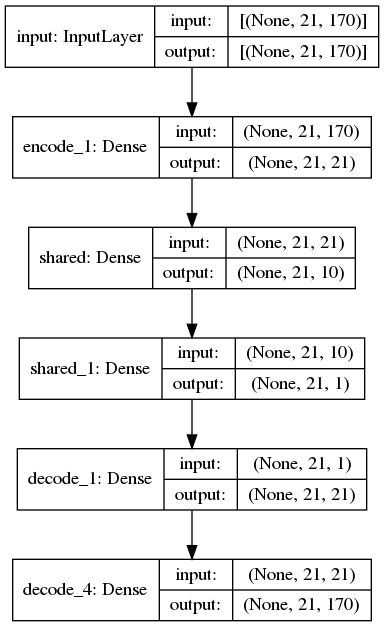

In [423]:
autoencoder, encoder = model_1(170)
tf.keras.utils.plot_model(autoencoder, to_file="autoencoder.png", show_shapes=True)

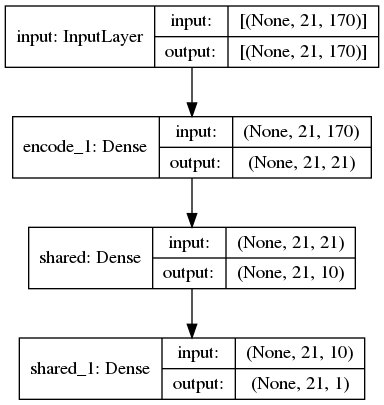

In [424]:
tf.keras.utils.plot_model(encoder, to_file="encoder.png", show_shapes=True)

In [425]:
autoencoder.summary()

Model: "model_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 21, 170)]         0         
_________________________________________________________________
encode_1 (Dense)             (None, 21, 21)            3591      
_________________________________________________________________
shared (Dense)               (None, 21, 10)            220       
_________________________________________________________________
shared_1 (Dense)             (None, 21, 1)             11        
_________________________________________________________________
decode_1 (Dense)             (None, 21, 21)            42        
_________________________________________________________________
decode_4 (Dense)             (None, 21, 170)           3740      
Total params: 7,604
Trainable params: 7,604
Non-trainable params: 0
________________________________________________________

In [430]:
def train_model(model_input, autoencoder, encoder):
    
#     autoencoder, encoder = build_model(d)
    
    optimizer = keras.optimizers.Adam(lr=0.001)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    
    autoencoder.fit(model_input, model_input,
                epochs=2000,
                batch_size=16,
                shuffle=False,
                   )
    
    denoised_signal = autoencoder.predict(model_input)

    return autoencoder, encoder, denoised_signal

In [91]:
autoencoder_1, encoder_1, denoised_signal_1 = train_model(x1, autoencoder, encoder)

Epoch 1/1000
57/57 [==============================] - 1s 4ms/step - loss: 0.0853
Epoch 2/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0852
Epoch 3/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0851
Epoch 4/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 5/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0824
Epoch 6/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0816
Epoch 7/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 8/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0814
Epoch 9/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0813
Epoch 10/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0812
Epoch 11/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0811
Epoch 12/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 13/1000
57/57 [====

57/57 [==============================] - 0s 5ms/step - loss: 0.0678
Epoch 102/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0679
Epoch 103/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.0679
Epoch 104/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0679
Epoch 105/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 106/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0643
Epoch 107/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0642
Epoch 108/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0642
Epoch 109/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0642
Epoch 110/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0642
Epoch 111/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0642
Epoch 112/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0642
Epoch 113/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 298/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 299/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 300/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 301/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0522
Epoch 302/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 303/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 304/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 305/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0520
Epoch 306/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0520
Epoch 307/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 308/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 309/1000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 494/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 495/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 496/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 497/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0468
Epoch 498/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 499/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 500/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 501/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0468
Epoch 502/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 503/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 504/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.0467
Epoch 505/1000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0451
Epoch 690/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0451
Epoch 691/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0452
Epoch 692/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0452
Epoch 693/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 694/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 695/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0443
Epoch 696/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 697/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 698/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 699/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0444
Epoch 700/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 701/1000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 886/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 887/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 888/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 889/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 890/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 891/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0440
Epoch 892/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 893/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 894/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 895/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0440
Epoch 896/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0440
Epoch 897/1000
57/5

In [96]:
autoencoder_1.fit(x1, x1,
                epochs=1000,
                batch_size=16,
                shuffle=False,
                   )

Epoch 1/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0426
Epoch 2/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 3/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 4/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 5/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 6/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 7/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0414
Epoch 8/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 9/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 10/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 11/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0414
Epoch 12/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 13/1000
57/57 [====

57/57 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 102/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 103/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0394
Epoch 104/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0394
Epoch 105/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0395
Epoch 106/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 107/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0396
Epoch 108/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0395
Epoch 109/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0396
Epoch 110/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 111/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 112/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 113/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 298/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 299/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 300/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 301/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 302/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 303/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0351
Epoch 304/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 305/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 306/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 307/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 308/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 309/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 494/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 495/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0348
Epoch 496/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 497/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 498/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 499/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 500/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 501/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 502/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0348
Epoch 503/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 504/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 505/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 690/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 691/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 692/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 693/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0352
Epoch 694/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 695/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 696/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 697/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 698/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0348
Epoch 699/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 700/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 701/1000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 886/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 887/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 888/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 889/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 890/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 891/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 892/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 893/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 894/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 895/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 896/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 897/1000
57/5

In [97]:
denoised_signal_2 = autoencoder_1.predict(x1)

In [100]:
autoencoder_1.fit(x1, x1,
                epochs=1000,
                batch_size=16,
                shuffle=False,
                   )

Epoch 1/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 2/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0350
Epoch 3/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 4/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 5/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 6/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 7/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 8/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 9/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0354
Epoch 10/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 11/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 12/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 13/1000
57/57 [====

57/57 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 102/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 103/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 104/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0348
Epoch 105/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 106/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 107/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 108/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 109/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 110/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0348
Epoch 111/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 112/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0348
Epoch 113/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.0348
Epoch 298/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 299/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 300/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 301/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 302/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 303/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 304/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 305/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 306/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 307/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 308/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 309/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 494/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 495/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 496/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 497/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 498/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 499/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 500/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 501/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 502/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 503/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 504/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 505/1000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 690/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 691/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 692/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0348
Epoch 693/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 694/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 695/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 696/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 697/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 698/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 699/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 700/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 701/1000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 886/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 887/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 888/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 889/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 890/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 891/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 892/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 893/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 894/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0352
Epoch 895/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 896/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 897/1000
57/5

In [101]:
denoised_signal_3 = autoencoder_1.predict(x1)

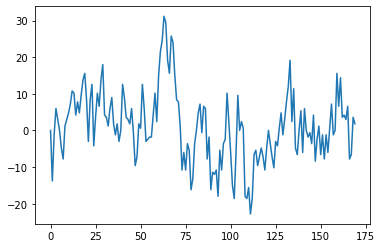

In [250]:
plt.plot(np.arange(170),frame_of_1[0][0])

In [93]:
denoised_signal_1.shape

(900, 21, 170)

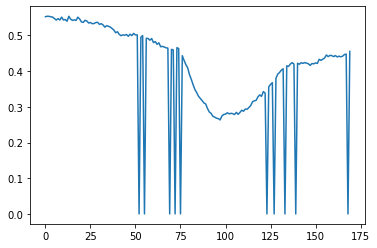

In [251]:
plt.plot(np.arange(170),denoised_signal_1[0][0])

In [98]:
denoised_signal_2.shape

(900, 21, 170)

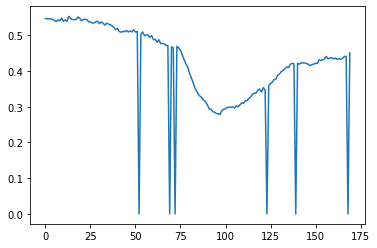

In [252]:
plt.plot(np.arange(170),denoised_signal_2[0][0])

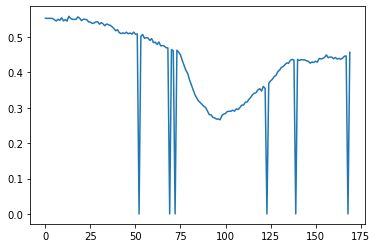

In [253]:
plt.plot(np.arange(170),denoised_signal_3[0][0])

In [258]:
m = fourier_trans(denoised_signal_3)

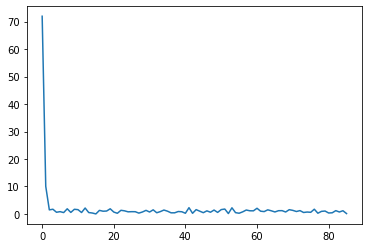

In [259]:
plt.plot(abs(m[0][0]))

In [272]:
autoencoder_1.save('autoencoder_1')

INFO:tensorflow:Assets written to: autoencoder_1/assets


In [509]:
encoder_1.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 21, 170)]         0         
_________________________________________________________________
encode_1 (Dense)             (None, 21, 21)            3591      
_________________________________________________________________
shared (Dense)               (None, 21, 10)            220       
Total params: 3,811
Trainable params: 3,811
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def gen_features(raw_data, encoder):
    features = encoder.predict(raw_data)
    features.reshape((900,210))
    
    return features

In [514]:
features_1 = encoder_1.predict(x1)

In [515]:
features_1.shape

(900, 21, 10)

In [519]:
f11 = features_1.reshape((900,210))
f11.shape

(900, 210)

In [520]:
frame_of_3.shape

(284, 21, 170)

In [ ]:
def gen_dataset(features):
    dataset = pd.DataFrame(features)
    dataset['label'] = 0
    dataset.loc[:289, 'label'] = 1
    dataset.loc[289:616, 'label'] = 2
    dataset.loc[616:, 'label'] = 3
    
    return dataset

In [521]:
dataset_1 = pd.DataFrame(f11)
dataset_1['label'] = 0
dataset_1.loc[:289, 'label'] = 1
dataset_1.loc[289:616, 'label'] = 2
dataset_1.loc[616:, 'label'] = 3
dataset_1

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,label
0,0.107410,0.000000,0.095720,0.000000,0.123246,0.105642,0.063802,0.118462,0.0,0.193802,...,0.0,0.100545,0.0,0.163230,0.143977,0.087351,0.126145,0.0,0.150804,1
1,0.126435,0.000000,0.083035,0.000000,0.163149,0.147226,0.116446,0.170474,0.0,0.181108,...,0.0,0.107972,0.0,0.168072,0.136421,0.066493,0.036665,0.0,0.063731,1
2,0.097041,0.000000,0.137216,0.000000,0.164882,0.129442,0.067183,0.132149,0.0,0.251142,...,0.0,0.147689,0.0,0.173616,0.149667,0.031398,0.071499,0.0,0.130820,1
3,0.085633,0.000000,0.099761,0.000000,0.122315,0.110829,0.044209,0.090255,0.0,0.142576,...,0.0,0.086594,0.0,0.120291,0.126974,0.040594,0.094460,0.0,0.080938,1
4,0.108520,0.000000,0.122191,0.000000,0.190755,0.159788,0.102901,0.158443,0.0,0.213806,...,0.0,0.110667,0.0,0.161464,0.136826,0.059611,0.058486,0.0,0.087552,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.146852,0.000000,0.000000,0.147635,0.012578,0.048530,0.084721,0.241880,0.0,0.264239,...,0.0,0.138235,0.0,0.194361,0.143262,0.064940,0.021908,0.0,0.096645,3
896,0.073797,0.000000,0.097750,0.000000,0.145656,0.154223,0.074372,0.195924,0.0,0.190707,...,0.0,0.083922,0.0,0.147016,0.128057,0.067657,0.039943,0.0,0.034226,3
897,0.037424,0.075609,0.122631,0.000000,0.168971,0.175944,0.048033,0.144893,0.0,0.117476,...,0.0,0.129960,0.0,0.168657,0.121963,0.071038,0.077716,0.0,0.193035,3
898,0.072727,0.000000,0.076872,0.000000,0.127678,0.145008,0.065981,0.161159,0.0,0.118544,...,0.0,0.080122,0.0,0.120930,0.092372,0.089524,0.118673,0.0,0.210826,3


In [ ]:
def get_train_test(dataset):
    train, test = train_test_split(dataset, test_size=0.2, shuffle=True, random_state=0)
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    
    X_train = train[train.columns[:-1]]
    y_train = train['label']

    X_test = test[test.columns[:-1]]
    y_test = test['label']
    
    return X_train, y_train, X_test, y_test

In [523]:
train, test = train_test_split(dataset_1, test_size=0.2, shuffle=True, random_state=0)

In [524]:
train

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,label
304,0.055052,0.028440,0.128130,0.000000,0.178501,0.168890,0.055762,0.118074,0.0,0.120804,...,0.000000,0.055228,0.0,0.129835,0.112172,0.092236,0.059474,0.0,0.049377,2
831,0.276913,0.000000,0.009649,0.000000,0.083190,0.015267,0.159502,0.056932,0.0,0.213753,...,0.017074,0.126010,0.0,0.150747,0.143805,0.026078,0.078986,0.0,0.100280,3
240,0.049259,0.043563,0.119165,0.000000,0.172714,0.176636,0.060984,0.157768,0.0,0.134207,...,0.000000,0.094568,0.0,0.169787,0.129319,0.114393,0.113823,0.0,0.178616,1
1,0.126435,0.000000,0.083035,0.000000,0.163149,0.147226,0.116446,0.170474,0.0,0.181108,...,0.000000,0.107972,0.0,0.168072,0.136421,0.066493,0.036665,0.0,0.063731,1
439,0.106683,0.000000,0.107630,0.000000,0.189011,0.170795,0.113300,0.185412,0.0,0.198061,...,0.000000,0.081203,0.0,0.143594,0.117283,0.079124,0.051398,0.0,0.074344,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.121489,0.000000,0.084900,0.000000,0.156204,0.136065,0.099065,0.121859,0.0,0.139061,...,0.000000,0.116742,0.0,0.186861,0.146422,0.097769,0.102016,0.0,0.162291,3
192,0.029147,0.166415,0.112127,0.000000,0.179241,0.198302,0.058749,0.160849,0.0,0.073911,...,0.000000,0.087713,0.0,0.154387,0.112988,0.119172,0.133407,0.0,0.225178,1
629,0.133589,0.000000,0.001253,0.158447,0.018504,0.061948,0.083103,0.256440,0.0,0.255799,...,0.000000,0.155323,0.0,0.220028,0.156824,0.071490,0.012514,0.0,0.099552,3
559,0.074883,0.033647,0.082540,0.000000,0.166516,0.181388,0.095098,0.189230,0.0,0.109496,...,0.000000,0.137632,0.0,0.209030,0.143237,0.094472,0.039886,0.0,0.141173,2


In [525]:
test = test.reset_index(drop=True)

In [526]:
test

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,label
0,0.092631,0.000000,0.085570,0.000000,0.156631,0.160472,0.096506,0.189301,0.0,0.162340,...,0.000000,0.075423,0.0,0.175119,0.161669,0.109953,0.108102,0.0,0.057184,2
1,0.047164,0.059014,0.106207,0.000000,0.152649,0.161715,0.046989,0.124743,0.0,0.088662,...,0.000000,0.036516,0.0,0.104895,0.069935,0.128555,0.107973,0.0,0.185824,1
2,0.078601,0.000000,0.117673,0.000000,0.168913,0.158689,0.076247,0.165218,0.0,0.191133,...,0.045188,0.120789,0.0,0.193534,0.167891,0.069511,0.058011,0.0,0.050697,2
3,0.108745,0.000000,0.036293,0.000000,0.134445,0.158366,0.115599,0.189799,0.0,0.076872,...,0.000000,0.123126,0.0,0.193694,0.147081,0.087452,0.058031,0.0,0.115965,1
4,0.146263,0.000000,0.080928,0.000000,0.139344,0.109489,0.104544,0.129105,0.0,0.200516,...,0.000000,0.101080,0.0,0.145568,0.139513,0.059137,0.113413,0.0,0.122865,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.137845,0.000000,0.028084,0.000000,0.157955,0.173512,0.156554,0.220770,0.0,0.096826,...,0.000000,0.101484,0.0,0.135966,0.103309,0.054517,0.036620,0.0,0.110503,2
176,0.090637,0.044763,0.061135,0.000000,0.165284,0.183174,0.112733,0.185089,0.0,0.069649,...,0.000000,0.087719,0.0,0.150434,0.085115,0.119037,0.066773,0.0,0.209417,1
177,0.114662,0.000000,0.008004,0.163814,0.022412,0.071898,0.071665,0.253681,0.0,0.236096,...,0.000000,0.147568,0.0,0.197674,0.137570,0.071115,0.038756,0.0,0.153568,3
178,0.045273,0.077404,0.121423,0.000000,0.179771,0.183134,0.060600,0.148529,0.0,0.114325,...,0.000000,0.069607,0.0,0.098532,0.091854,0.051282,0.072786,0.0,0.104179,1


In [527]:
X_train = train[train.columns[:-1]]
y_train = train['label']

X_test = test[test.columns[:-1]]
y_test = test['label']

In [528]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
304,0.055052,0.028440,0.128130,0.000000,0.178501,0.168890,0.055762,0.118074,0.0,0.120804,...,0.135224,0.000000,0.055228,0.0,0.129835,0.112172,0.092236,0.059474,0.0,0.049377
831,0.276913,0.000000,0.009649,0.000000,0.083190,0.015267,0.159502,0.056932,0.0,0.213753,...,0.045456,0.017074,0.126010,0.0,0.150747,0.143805,0.026078,0.078986,0.0,0.100280
240,0.049259,0.043563,0.119165,0.000000,0.172714,0.176636,0.060984,0.157768,0.0,0.134207,...,0.145668,0.000000,0.094568,0.0,0.169787,0.129319,0.114393,0.113823,0.0,0.178616
1,0.126435,0.000000,0.083035,0.000000,0.163149,0.147226,0.116446,0.170474,0.0,0.181108,...,0.098042,0.000000,0.107972,0.0,0.168072,0.136421,0.066493,0.036665,0.0,0.063731
439,0.106683,0.000000,0.107630,0.000000,0.189011,0.170795,0.113300,0.185412,0.0,0.198061,...,0.121236,0.000000,0.081203,0.0,0.143594,0.117283,0.079124,0.051398,0.0,0.074344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.121489,0.000000,0.084900,0.000000,0.156204,0.136065,0.099065,0.121859,0.0,0.139061,...,0.118673,0.000000,0.116742,0.0,0.186861,0.146422,0.097769,0.102016,0.0,0.162291
192,0.029147,0.166415,0.112127,0.000000,0.179241,0.198302,0.058749,0.160849,0.0,0.073911,...,0.160148,0.000000,0.087713,0.0,0.154387,0.112988,0.119172,0.133407,0.0,0.225178
629,0.133589,0.000000,0.001253,0.158447,0.018504,0.061948,0.083103,0.256440,0.0,0.255799,...,0.097100,0.000000,0.155323,0.0,0.220028,0.156824,0.071490,0.012514,0.0,0.099552
559,0.074883,0.033647,0.082540,0.000000,0.166516,0.181388,0.095098,0.189230,0.0,0.109496,...,0.127263,0.000000,0.137632,0.0,0.209030,0.143237,0.094472,0.039886,0.0,0.141173


In [529]:
y_train

304    2
831    3
240    1
1      1
439    2
      ..
835    3
192    1
629    3
559    2
684    3
Name: label, Length: 720, dtype: int64

In [530]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.092631,0.000000,0.085570,0.000000,0.156631,0.160472,0.096506,0.189301,0.0,0.162340,...,0.114467,0.000000,0.075423,0.0,0.175119,0.161669,0.109953,0.108102,0.0,0.057184
1,0.047164,0.059014,0.106207,0.000000,0.152649,0.161715,0.046989,0.124743,0.0,0.088662,...,0.199200,0.000000,0.036516,0.0,0.104895,0.069935,0.128555,0.107973,0.0,0.185824
2,0.078601,0.000000,0.117673,0.000000,0.168913,0.158689,0.076247,0.165218,0.0,0.191133,...,0.076840,0.045188,0.120789,0.0,0.193534,0.167891,0.069511,0.058011,0.0,0.050697
3,0.108745,0.000000,0.036293,0.000000,0.134445,0.158366,0.115599,0.189799,0.0,0.076872,...,0.112649,0.000000,0.123126,0.0,0.193694,0.147081,0.087452,0.058031,0.0,0.115965
4,0.146263,0.000000,0.080928,0.000000,0.139344,0.109489,0.104544,0.129105,0.0,0.200516,...,0.077951,0.000000,0.101080,0.0,0.145568,0.139513,0.059137,0.113413,0.0,0.122865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.137845,0.000000,0.028084,0.000000,0.157955,0.173512,0.156554,0.220770,0.0,0.096826,...,0.109015,0.000000,0.101484,0.0,0.135966,0.103309,0.054517,0.036620,0.0,0.110503
176,0.090637,0.044763,0.061135,0.000000,0.165284,0.183174,0.112733,0.185089,0.0,0.069649,...,0.188650,0.000000,0.087719,0.0,0.150434,0.085115,0.119037,0.066773,0.0,0.209417
177,0.114662,0.000000,0.008004,0.163814,0.022412,0.071898,0.071665,0.253681,0.0,0.236096,...,0.107229,0.000000,0.147568,0.0,0.197674,0.137570,0.071115,0.038756,0.0,0.153568
178,0.045273,0.077404,0.121423,0.000000,0.179771,0.183134,0.060600,0.148529,0.0,0.114325,...,0.105800,0.000000,0.069607,0.0,0.098532,0.091854,0.051282,0.072786,0.0,0.104179


In [531]:
y_test

0      2
1      1
2      2
3      1
4      2
      ..
175    2
176    1
177    3
178    1
179    1
Name: label, Length: 180, dtype: int64

In [532]:
np.array(X_test).shape

(180, 210)

# SVM (Support vector machine)

In [533]:
train_acc, test_acc, predicted_test, confusion, report = SVM_ml(X_train, y_train, X_test, y_test)

In [534]:
print(train_acc)
print(test_acc)

0.8708333333333333
0.7944444444444444


In [535]:
print(confusion)

[[40  7  7]
 [ 7 56  2]
 [11  3 47]]


In [536]:
print(report)

              precision    recall  f1-score   support

           1       0.69      0.74      0.71        54
           2       0.85      0.86      0.85        65
           3       0.84      0.77      0.80        61

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.80      0.79      0.80       180



# Decision Tree

In [537]:
train_acc, test_acc, predicted_test, confusion, report = dTree_ml(X_train, y_train, X_test, y_test)

In [538]:
print(train_acc)
print(test_acc)

0.7972222222222223
0.6333333333333333


In [539]:
print(confusion)

[[32 11 11]
 [16 38 11]
 [12  5 44]]


In [540]:
print(report)

              precision    recall  f1-score   support

           1       0.53      0.59      0.56        54
           2       0.70      0.58      0.64        65
           3       0.67      0.72      0.69        61

    accuracy                           0.63       180
   macro avg       0.63      0.63      0.63       180
weighted avg       0.64      0.63      0.63       180



# Random Forest

In [541]:
train_acc, test_acc, predicted_test, confusion, report = rforest_ml(X_train, y_train, X_test, y_test)

In [542]:
print(train_acc)
print(test_acc)

1.0
0.7333333333333333


In [543]:
print(confusion)

[[33 12  9]
 [ 8 54  3]
 [10  6 45]]


In [544]:
print(report)

              precision    recall  f1-score   support

           1       0.65      0.61      0.63        54
           2       0.75      0.83      0.79        65
           3       0.79      0.74      0.76        61

    accuracy                           0.73       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.73      0.73      0.73       180



# AdaBoosting

In [545]:
train_acc, test_acc, predicted_test, confusion, report = adaBoost_ml(X_train, y_train, X_test, y_test)

In [546]:
print(train_acc)
print(test_acc)

0.9263888888888889
0.6944444444444444


In [547]:
print(confusion)

[[38  8  8]
 [15 45  5]
 [16  3 42]]


In [548]:
print(report)

              precision    recall  f1-score   support

           1       0.55      0.70      0.62        54
           2       0.80      0.69      0.74        65
           3       0.76      0.69      0.72        61

    accuracy                           0.69       180
   macro avg       0.71      0.69      0.70       180
weighted avg       0.71      0.69      0.70       180



# Bagging

In [549]:
train_acc, test_acc, predicted_test, confusion, report = bagging_ml(X_train, y_train, X_test, y_test)

In [550]:
print(train_acc)
print(test_acc)

0.9944444444444445
0.6944444444444444


In [551]:
print(confusion)

[[31  9 14]
 [10 48  7]
 [ 9  6 46]]


In [552]:
print(report)

              precision    recall  f1-score   support

           1       0.62      0.57      0.60        54
           2       0.76      0.74      0.75        65
           3       0.69      0.75      0.72        61

    accuracy                           0.69       180
   macro avg       0.69      0.69      0.69       180
weighted avg       0.69      0.69      0.69       180



# NB_classifier

## Gaussian_NB

In [553]:
train_acc, test_acc, predicted_test, confusion, report = gaussianNB_ml(X_train, y_train, X_test, y_test)

In [554]:
print(train_acc)
print(test_acc)

0.6069444444444444
0.5833333333333334


In [555]:
print(confusion)

[[26 25  3]
 [ 7 52  6]
 [18 16 27]]


In [556]:
print(report)

              precision    recall  f1-score   support

           1       0.51      0.48      0.50        54
           2       0.56      0.80      0.66        65
           3       0.75      0.44      0.56        61

    accuracy                           0.58       180
   macro avg       0.61      0.57      0.57       180
weighted avg       0.61      0.58      0.57       180



## Bernoulli_NB

In [557]:
train_acc, test_acc, predicted_test, confusion, report = bernoulliNB_ml(X_train, y_train, X_test, y_test)

In [558]:
print(train_acc)
print(test_acc)

0.5444444444444444
0.5222222222222223


In [559]:
print(confusion)

[[19 28  7]
 [10 46  9]
 [17 15 29]]


In [560]:
print(report)

              precision    recall  f1-score   support

           1       0.41      0.35      0.38        54
           2       0.52      0.71      0.60        65
           3       0.64      0.48      0.55        61

    accuracy                           0.52       180
   macro avg       0.52      0.51      0.51       180
weighted avg       0.53      0.52      0.52       180



# MLP (Multi Layer perceptron) classifier

In [561]:
train_acc, test_acc, predicted_test, confusion, report = MLP_ml(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [562]:
print(train_acc)
print(test_acc)

0.9055555555555556
0.85


In [563]:
print(confusion)

[[41  5  8]
 [ 3 59  3]
 [ 7  1 53]]


In [564]:
print(report)

              precision    recall  f1-score   support

           1       0.80      0.76      0.78        54
           2       0.91      0.91      0.91        65
           3       0.83      0.87      0.85        61

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



# Quadratic Discriminant Analysis

In [499]:
train_acc, test_acc, predicted_test, confusion, report = QDA_ml(X_train, y_train, X_test, y_test)

In [500]:
print(train_acc)
print(test_acc)

0.7277777777777777
0.49444444444444446


In [501]:
print(confusion)

[[22 27  5]
 [17 37 11]
 [10 21 30]]


In [502]:
print(report)

              precision    recall  f1-score   support

           1       0.45      0.41      0.43        54
           2       0.44      0.57      0.49        65
           3       0.65      0.49      0.56        61

    accuracy                           0.49       180
   macro avg       0.51      0.49      0.49       180
weighted avg       0.51      0.49      0.50       180



# KNN

In [503]:
train_acc, test_acc, predicted_test, confusion, report = KNN_ml(X_train, y_train, X_test, y_test)

In [504]:
print(train_acc)
print(test_acc)

0.7222222222222222
0.46111111111111114


In [505]:
print(confusion)

[[29 22  3]
 [31 27  7]
 [19 15 27]]


In [506]:
print(report)

              precision    recall  f1-score   support

           1       0.37      0.54      0.44        54
           2       0.42      0.42      0.42        65
           3       0.73      0.44      0.55        61

    accuracy                           0.46       180
   macro avg       0.51      0.47      0.47       180
weighted avg       0.51      0.46      0.47       180



In [431]:
autoencoder_4, encoder_4, denoised_signal_4 = train_model(x1, autoencoder, encoder)

/home/suraj/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/2000
57/57 [==============================] - 2s 5ms/step - loss: 0.0715
Epoch 2/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 3/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0696
Epoch 4/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 5/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 6/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 7/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 8/2000
57/57 [==============================] - 0s 7ms/step - loss: 0.0696
Epoch 9/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 10/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 11/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 12/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0696
Epoch 13/2000
57/57 [====

57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 102/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 103/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 104/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 105/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 106/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 107/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 108/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 109/2000
57/57 [==============================] - 0s 5ms/step - loss: 0.0697
Epoch 110/2000
57/57 [==============================] - 0s 5ms/step - loss: 0.0697
Epoch 111/2000
57/57 [==============================] - 0s 5ms/step - loss: 0.0697
Epoch 112/2000
57/57 [==============================] - 0s 5ms/step - loss: 0.0698
Epoch 113/2000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 298/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 299/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0696
Epoch 300/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 301/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 302/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 303/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 304/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 305/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 306/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0700
Epoch 307/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0699
Epoch 308/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 309/2000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 494/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 495/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 496/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 497/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 498/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 499/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0696
Epoch 500/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 501/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 502/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0699
Epoch 503/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 504/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 505/2000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 690/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 691/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0696
Epoch 692/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 693/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 694/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 695/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 696/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 697/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0702
Epoch 698/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 699/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 700/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 701/2000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 886/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 887/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 888/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 889/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 890/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 891/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0686
Epoch 892/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0685
Epoch 893/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 894/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 895/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 896/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0682
Epoch 897/2000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 1081/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 1082/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 1083/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 1084/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 1085/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 1086/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 1087/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 1088/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 1089/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 1090/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 1091/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 10

57/57 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 1275/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 1276/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 1277/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 1278/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0671
Epoch 1279/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 1280/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 1281/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 1282/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 1283/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 1284/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 1285/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0671
Epoch 12

57/57 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 1469/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 1470/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 1471/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 1472/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 1473/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0659
Epoch 1474/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1475/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1476/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1477/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0659
Epoch 1478/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 1479/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0659
Epoch 14

57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1663/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0659
Epoch 1664/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1665/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1666/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1667/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 1668/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 1669/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1670/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1671/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 1672/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 1673/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 16

57/57 [==============================] - 0s 4ms/step - loss: 0.0647
Epoch 1857/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0646
Epoch 1858/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 1859/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0646
Epoch 1860/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 1861/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0646
Epoch 1862/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0646
Epoch 1863/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0646
Epoch 1864/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0646
Epoch 1865/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 1866/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0646
Epoch 1867/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0645
Epoch 18

In [507]:
autoencoder_4.save("autoencoder_4")

INFO:tensorflow:Assets written to: autoencoder_4/assets


In [508]:
encoder_4.save('encoder_4')

INFO:tensorflow:Assets written to: encoder_4/assets


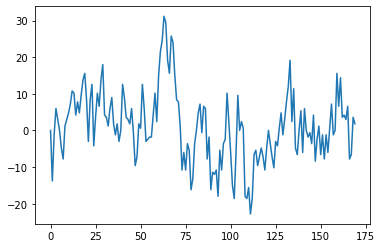

In [432]:
plt.plot(np.arange(170),frame_of_1[0][0])

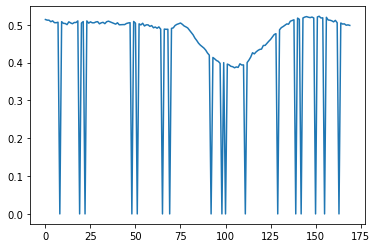

In [433]:
plt.plot(np.arange(170),denoised_signal_4[0][0])

In [434]:
features_4 = encoder_4.predict(x1)

In [435]:
features_4.shape

(900, 21, 1)

In [436]:
f4 = features_4.reshape((900, 21))
f4.shape

(900, 21)

In [437]:
frame_of_3.shape

(284, 21, 170)

In [438]:
dataset_4 = pd.DataFrame(f4)
dataset_4['label'] = 0
dataset_4.loc[:289, 'label'] = 1
dataset_4.loc[289:616, 'label'] = 2
dataset_4.loc[616:, 'label'] = 3
dataset_4

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,0.315386,0.340781,0.396618,0.390712,0.326814,0.367320,0.267517,0.374464,0.343298,0.462409,...,0.283313,0.432213,0.333158,0.412707,0.326911,0.432924,0.433629,0.419988,0.367861,1
1,0.316159,0.289253,0.345907,0.290536,0.354608,0.334811,0.379945,0.459227,0.314629,0.341004,...,0.385078,0.294072,0.409619,0.309843,0.370516,0.363739,0.281287,0.446159,0.419041,1
2,0.408880,0.443952,0.374603,0.283864,0.392277,0.252923,0.409827,0.430656,0.402911,0.430035,...,0.438520,0.358023,0.421860,0.376811,0.388422,0.405090,0.363482,0.473212,0.468785,1
3,0.339600,0.366873,0.316176,0.298304,0.368996,0.270888,0.404399,0.392552,0.384065,0.377630,...,0.291279,0.341119,0.377717,0.309054,0.382282,0.429670,0.377901,0.466859,0.333132,1
4,0.412569,0.361608,0.356247,0.382645,0.379310,0.262911,0.447440,0.439617,0.407357,0.382605,...,0.372094,0.418194,0.332078,0.410461,0.479950,0.425346,0.414598,0.436866,0.417982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.000000,0.067814,0.074672,0.356561,0.323357,0.490616,0.467935,0.477945,0.474754,...,0.097851,0.000000,0.479667,0.434354,0.574523,0.574523,0.028971,0.296104,0.530129,3
896,0.335516,0.290029,0.279232,0.266972,0.399585,0.318187,0.465315,0.335857,0.379816,0.352392,...,0.330611,0.271297,0.311353,0.282568,0.395382,0.372707,0.264113,0.409251,0.357686,3
897,0.414435,0.348352,0.325662,0.316008,0.370082,0.269957,0.445010,0.453415,0.465660,0.416573,...,0.417020,0.363089,0.445603,0.407374,0.487928,0.428446,0.282430,0.314807,0.415976,3
898,0.302829,0.261188,0.361491,0.322706,0.388800,0.270367,0.349198,0.315576,0.268019,0.202780,...,0.347281,0.251991,0.388662,0.317760,0.440722,0.245062,0.353885,0.352119,0.303779,3


In [439]:
from sklearn.model_selection import train_test_split

In [457]:
train, test = train_test_split(dataset_4, test_size=0.2, shuffle=True, random_state=0)

In [458]:
train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
304,0.424416,0.370869,0.360405,0.314905,0.305253,0.337869,0.299476,0.285645,0.272909,0.327989,...,0.379089,0.291209,0.347370,0.264579,0.352533,0.389948,0.338835,0.397385,0.288705,2
831,0.143692,0.119239,0.231846,0.197783,0.495129,0.203319,0.461471,0.574523,0.574523,0.574523,...,0.234316,0.173952,0.556886,0.331489,0.574523,0.526303,0.163614,0.207692,0.412331,3
240,0.412135,0.404772,0.243194,0.323233,0.323407,0.319601,0.292176,0.366782,0.366628,0.452915,...,0.334648,0.408465,0.358912,0.487901,0.339544,0.457598,0.331555,0.480642,0.349070,1
1,0.316159,0.289253,0.345907,0.290536,0.354608,0.334811,0.379945,0.459227,0.314629,0.341004,...,0.385078,0.294072,0.409619,0.309843,0.370516,0.363739,0.281287,0.446159,0.419041,1
439,0.386788,0.349385,0.403750,0.325408,0.334182,0.340885,0.297642,0.292644,0.375399,0.251405,...,0.330479,0.300522,0.272338,0.291315,0.319143,0.327823,0.405985,0.420802,0.331690,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.332554,0.355888,0.245650,0.303729,0.348116,0.260696,0.377638,0.424836,0.419022,0.348449,...,0.246693,0.256873,0.318194,0.281751,0.489818,0.410788,0.250862,0.367468,0.414100,3
192,0.405499,0.348234,0.452247,0.434124,0.401217,0.330564,0.312397,0.398653,0.415994,0.458908,...,0.458631,0.386456,0.447655,0.429936,0.350436,0.433038,0.454826,0.468225,0.307589,1
629,0.000000,0.029712,0.040471,0.045303,0.420311,0.247846,0.574523,0.574523,0.574523,0.574523,...,0.243375,0.026129,0.469390,0.289716,0.574523,0.463854,0.028817,0.279532,0.574523,3
559,0.336861,0.324717,0.351159,0.190484,0.419224,0.240952,0.574523,0.485636,0.396925,0.387980,...,0.427045,0.230481,0.335533,0.242674,0.415166,0.379982,0.189412,0.424722,0.485504,2


In [459]:
test = test.reset_index(drop=True)

In [460]:
test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,0.320815,0.211291,0.377417,0.241742,0.404476,0.293279,0.340499,0.455145,0.322210,0.411958,...,0.344442,0.132523,0.255161,0.201389,0.327730,0.415159,0.318691,0.483623,0.357522,2
1,0.375798,0.431958,0.417286,0.416841,0.305938,0.296290,0.292281,0.307284,0.269086,0.253362,...,0.433373,0.574523,0.420225,0.464545,0.323646,0.416251,0.444849,0.283675,0.194978,1
2,0.388817,0.297990,0.367477,0.320871,0.370126,0.294432,0.378588,0.417583,0.402789,0.458455,...,0.349007,0.323236,0.371699,0.398977,0.325177,0.366404,0.367984,0.366870,0.457890,2
3,0.214394,0.260225,0.370546,0.301184,0.320329,0.387644,0.365468,0.372595,0.357133,0.343496,...,0.334349,0.327925,0.335604,0.336754,0.370201,0.331404,0.356320,0.368434,0.445846,1
4,0.311383,0.341283,0.316392,0.415958,0.451782,0.326415,0.433910,0.378064,0.361468,0.284420,...,0.304145,0.364051,0.257450,0.277953,0.356769,0.322223,0.304719,0.364968,0.368182,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.227774,0.229795,0.285162,0.288209,0.151624,0.574523,0.347258,0.406650,0.271537,0.355024,...,0.272445,0.308648,0.268341,0.418564,0.291265,0.397150,0.264298,0.311215,0.362363,2
176,0.301005,0.276000,0.318245,0.367093,0.317030,0.344714,0.225084,0.383743,0.203466,0.291108,...,0.244059,0.304170,0.171354,0.277999,0.169108,0.241130,0.359048,0.456192,0.341358,1
177,0.000000,0.010830,0.067907,0.019997,0.574523,0.190454,0.574523,0.574523,0.574523,0.574523,...,0.185828,0.053105,0.574523,0.463648,0.574523,0.574523,0.037715,0.340284,0.574523,3
178,0.417536,0.431339,0.362358,0.329693,0.321849,0.359285,0.311481,0.339109,0.460706,0.505490,...,0.437659,0.369682,0.343658,0.359676,0.370484,0.437832,0.360217,0.441682,0.273167,1


In [461]:
X_train = train[train.columns[:-1]]
y_train = train['label']

X_test = test[test.columns[:-1]]
y_test = test['label']

In [462]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
304,0.424416,0.370869,0.360405,0.314905,0.305253,0.337869,0.299476,0.285645,0.272909,0.327989,...,0.363367,0.379089,0.291209,0.347370,0.264579,0.352533,0.389948,0.338835,0.397385,0.288705
831,0.143692,0.119239,0.231846,0.197783,0.495129,0.203319,0.461471,0.574523,0.574523,0.574523,...,0.574523,0.234316,0.173952,0.556886,0.331489,0.574523,0.526303,0.163614,0.207692,0.412331
240,0.412135,0.404772,0.243194,0.323233,0.323407,0.319601,0.292176,0.366782,0.366628,0.452915,...,0.574523,0.334648,0.408465,0.358912,0.487901,0.339544,0.457598,0.331555,0.480642,0.349070
1,0.316159,0.289253,0.345907,0.290536,0.354608,0.334811,0.379945,0.459227,0.314629,0.341004,...,0.380843,0.385078,0.294072,0.409619,0.309843,0.370516,0.363739,0.281287,0.446159,0.419041
439,0.386788,0.349385,0.403750,0.325408,0.334182,0.340885,0.297642,0.292644,0.375399,0.251405,...,0.255498,0.330479,0.300522,0.272338,0.291315,0.319143,0.327823,0.405985,0.420802,0.331690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.332554,0.355888,0.245650,0.303729,0.348116,0.260696,0.377638,0.424836,0.419022,0.348449,...,0.287524,0.246693,0.256873,0.318194,0.281751,0.489818,0.410788,0.250862,0.367468,0.414100
192,0.405499,0.348234,0.452247,0.434124,0.401217,0.330564,0.312397,0.398653,0.415994,0.458908,...,0.458542,0.458631,0.386456,0.447655,0.429936,0.350436,0.433038,0.454826,0.468225,0.307589
629,0.000000,0.029712,0.040471,0.045303,0.420311,0.247846,0.574523,0.574523,0.574523,0.574523,...,0.574523,0.243375,0.026129,0.469390,0.289716,0.574523,0.463854,0.028817,0.279532,0.574523
559,0.336861,0.324717,0.351159,0.190484,0.419224,0.240952,0.574523,0.485636,0.396925,0.387980,...,0.333176,0.427045,0.230481,0.335533,0.242674,0.415166,0.379982,0.189412,0.424722,0.485504


In [463]:
y_train

304    2
831    3
240    1
1      1
439    2
      ..
835    3
192    1
629    3
559    2
684    3
Name: label, Length: 720, dtype: int64

In [464]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.320815,0.211291,0.377417,0.241742,0.404476,0.293279,0.340499,0.455145,0.322210,0.411958,...,0.184556,0.344442,0.132523,0.255161,0.201389,0.327730,0.415159,0.318691,0.483623,0.357522
1,0.375798,0.431958,0.417286,0.416841,0.305938,0.296290,0.292281,0.307284,0.269086,0.253362,...,0.468415,0.433373,0.574523,0.420225,0.464545,0.323646,0.416251,0.444849,0.283675,0.194978
2,0.388817,0.297990,0.367477,0.320871,0.370126,0.294432,0.378588,0.417583,0.402789,0.458455,...,0.407811,0.349007,0.323236,0.371699,0.398977,0.325177,0.366404,0.367984,0.366870,0.457890
3,0.214394,0.260225,0.370546,0.301184,0.320329,0.387644,0.365468,0.372595,0.357133,0.343496,...,0.434693,0.334349,0.327925,0.335604,0.336754,0.370201,0.331404,0.356320,0.368434,0.445846
4,0.311383,0.341283,0.316392,0.415958,0.451782,0.326415,0.433910,0.378064,0.361468,0.284420,...,0.295102,0.304145,0.364051,0.257450,0.277953,0.356769,0.322223,0.304719,0.364968,0.368182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.227774,0.229795,0.285162,0.288209,0.151624,0.574523,0.347258,0.406650,0.271537,0.355024,...,0.465304,0.272445,0.308648,0.268341,0.418564,0.291265,0.397150,0.264298,0.311215,0.362363
176,0.301005,0.276000,0.318245,0.367093,0.317030,0.344714,0.225084,0.383743,0.203466,0.291108,...,0.175424,0.244059,0.304170,0.171354,0.277999,0.169108,0.241130,0.359048,0.456192,0.341358
177,0.000000,0.010830,0.067907,0.019997,0.574523,0.190454,0.574523,0.574523,0.574523,0.574523,...,0.574523,0.185828,0.053105,0.574523,0.463648,0.574523,0.574523,0.037715,0.340284,0.574523
178,0.417536,0.431339,0.362358,0.329693,0.321849,0.359285,0.311481,0.339109,0.460706,0.505490,...,0.478727,0.437659,0.369682,0.343658,0.359676,0.370484,0.437832,0.360217,0.441682,0.273167


In [465]:
y_test

0      2
1      1
2      2
3      1
4      2
      ..
175    2
176    1
177    3
178    1
179    1
Name: label, Length: 180, dtype: int64

In [466]:
np.array(X_test).shape

(180, 21)

# SVM (Support vector machine)

In [467]:
train_acc, test_acc, predicted_test, confusion, report = SVM_ml(X_train, y_train, X_test, y_test)

In [468]:
print(train_acc)
print(test_acc)

0.6875
0.5111111111111111


In [469]:
print(confusion)

[[28 21  5]
 [21 34 10]
 [14 17 30]]


In [470]:
print(report)

              precision    recall  f1-score   support

           1       0.44      0.52      0.48        54
           2       0.47      0.52      0.50        65
           3       0.67      0.49      0.57        61

    accuracy                           0.51       180
   macro avg       0.53      0.51      0.51       180
weighted avg       0.53      0.51      0.51       180



# Decision Tree

In [471]:
train_acc, test_acc, predicted_test, confusion, report = dTree_ml(X_train, y_train, X_test, y_test)

In [472]:
print(train_acc)
print(test_acc)

0.6347222222222222
0.5555555555555556


In [473]:
print(confusion)

[[30 17  7]
 [24 31 10]
 [11 11 39]]


In [474]:
print(report)

              precision    recall  f1-score   support

           1       0.46      0.56      0.50        54
           2       0.53      0.48      0.50        65
           3       0.70      0.64      0.67        61

    accuracy                           0.56       180
   macro avg       0.56      0.56      0.56       180
weighted avg       0.56      0.56      0.56       180



# Random Forest

In [475]:
train_acc, test_acc, predicted_test, confusion, report = rforest_ml(X_train, y_train, X_test, y_test)

In [476]:
print(train_acc)
print(test_acc)

1.0
0.5333333333333333


In [477]:
print(confusion)

[[24 27  3]
 [16 39 10]
 [10 18 33]]


In [478]:
print(report)

              precision    recall  f1-score   support

           1       0.48      0.44      0.46        54
           2       0.46      0.60      0.52        65
           3       0.72      0.54      0.62        61

    accuracy                           0.53       180
   macro avg       0.55      0.53      0.53       180
weighted avg       0.55      0.53      0.54       180



# AdaBoosting

In [479]:
train_acc, test_acc, predicted_test, confusion, report = adaBoost_ml(X_train, y_train, X_test, y_test)

In [480]:
print(train_acc)
print(test_acc)

0.7111111111111111
0.4888888888888889


In [481]:
print(confusion)

[[27 21  6]
 [22 32 11]
 [14 18 29]]


In [482]:
print(report)

              precision    recall  f1-score   support

           1       0.43      0.50      0.46        54
           2       0.45      0.49      0.47        65
           3       0.63      0.48      0.54        61

    accuracy                           0.49       180
   macro avg       0.50      0.49      0.49       180
weighted avg       0.50      0.49      0.49       180



# Bagging

In [483]:
train_acc, test_acc, predicted_test, confusion, report = bagging_ml(X_train, y_train, X_test, y_test)

In [484]:
print(train_acc)
print(test_acc)

0.9875
0.5222222222222223


In [485]:
print(confusion)

[[32 17  5]
 [27 28 10]
 [ 9 18 34]]


In [486]:
print(report)

              precision    recall  f1-score   support

           1       0.47      0.59      0.52        54
           2       0.44      0.43      0.44        65
           3       0.69      0.56      0.62        61

    accuracy                           0.52       180
   macro avg       0.54      0.53      0.53       180
weighted avg       0.54      0.52      0.52       180



# NB_classifier

## Gaussian_NB

In [487]:
train_acc, test_acc, predicted_test, confusion, report = gaussianNB_ml(X_train, y_train, X_test, y_test)

In [488]:
print(train_acc)
print(test_acc)

0.525
0.4722222222222222


In [489]:
print(confusion)

[[13 39  2]
 [13 46  6]
 [14 21 26]]


In [490]:
print(report)

              precision    recall  f1-score   support

           1       0.33      0.24      0.28        54
           2       0.43      0.71      0.54        65
           3       0.76      0.43      0.55        61

    accuracy                           0.47       180
   macro avg       0.51      0.46      0.45       180
weighted avg       0.51      0.47      0.46       180



## Bernoulli_NB

In [491]:
train_acc, test_acc, predicted_test, confusion, report = bernoulliNB_ml(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [492]:
print(train_acc)
print(test_acc)

0.4097222222222222
0.4166666666666667


In [493]:
print(confusion)

[[ 0 54  0]
 [ 0 65  0]
 [ 0 51 10]]


In [494]:
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        54
           2       0.38      1.00      0.55        65
           3       1.00      0.16      0.28        61

    accuracy                           0.42       180
   macro avg       0.46      0.39      0.28       180
weighted avg       0.48      0.42      0.30       180



# MLP (Multi Layer perceptron) classifier

In [495]:
train_acc, test_acc, predicted_test, confusion, report = MLP_ml(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [496]:
print(train_acc)
print(test_acc)

0.6125
0.5833333333333334


In [497]:
print(confusion)

[[26 23  5]
 [13 43  9]
 [13 12 36]]


In [498]:
print(report)

              precision    recall  f1-score   support

           1       0.50      0.48      0.49        54
           2       0.55      0.66      0.60        65
           3       0.72      0.59      0.65        61

    accuracy                           0.58       180
   macro avg       0.59      0.58      0.58       180
weighted avg       0.59      0.58      0.58       180



# Quadratic Discriminant Analysis

In [499]:
train_acc, test_acc, predicted_test, confusion, report = QDA_ml(X_train, y_train, X_test, y_test)

In [500]:
print(train_acc)
print(test_acc)

0.7277777777777777
0.49444444444444446


In [501]:
print(confusion)

[[22 27  5]
 [17 37 11]
 [10 21 30]]


In [502]:
print(report)

              precision    recall  f1-score   support

           1       0.45      0.41      0.43        54
           2       0.44      0.57      0.49        65
           3       0.65      0.49      0.56        61

    accuracy                           0.49       180
   macro avg       0.51      0.49      0.49       180
weighted avg       0.51      0.49      0.50       180



# KNN

In [503]:
train_acc, test_acc, predicted_test, confusion, report = KNN_ml(X_train, y_train, X_test, y_test)

In [504]:
print(train_acc)
print(test_acc)

0.7222222222222222
0.46111111111111114


In [505]:
print(confusion)

[[29 22  3]
 [31 27  7]
 [19 15 27]]


In [506]:
print(report)

              precision    recall  f1-score   support

           1       0.37      0.54      0.44        54
           2       0.42      0.42      0.42        65
           3       0.73      0.44      0.55        61

    accuracy                           0.46       180
   macro avg       0.51      0.47      0.47       180
weighted avg       0.51      0.46      0.47       180



In [309]:
def model_2(d):
    def build_encoder_model(d, input_embb):
        encoded = layers.Dense(int(d/3), activation='relu', activity_regularizer=regularizers.l1(10e-5), name='encode_1')(input_embb)
        encoded = layers.Dense(int(d/6), activation='relu', activity_regularizer=regularizers.l1(10e-5), name='encode_2')(encoded)
#         encoded = layers.Dense(int(d/6), activation='relu', activity_regularizer=regularizers.l1(10e-5), name='encode_3')(encoded)
    
        return encoded
    
    
    def build_decoder_model(encoded, d):
        decoded = layers.Dense(int(d/6), activation='relu', name='decode_1')(encoded)
        decoded = layers.Dense(int(d/3), activation='relu', name='decode_2')(decoded)
#         decoded = layers.Dense(int(d/2), activation='relu', name='decode_3')(decoded)        
        decoded = layers.Dense(d, activation='relu', name='decode_3')(decoded)
    
        return decoded

    
    input_embb_1 = keras.Input(shape=(21, 170,), name='input')
    
    conv_1 = layers.Conv1D(64, 3, activation='relu', input_shape=(21,170))(input_embb_1)
    conv_2 = layers.Conv1D(32, 3, activation='relu')(conv_1)
    flat = layers.Flatten()(conv_2)
    d1 = layers.Dense(int(d), activation='relu', activity_regularizer=regularizers.l1(10e-5), name='d1')(flat)
    
    encoded_1 = build_encoder_model(d, d1)
    
#     shared = layers.Con(d, activation='relu', name='shared')(encoded_1)
    
    decoded_1 = build_decoder_model(encoded_1, d)
    
    autoencoder = keras.Model(input_embb_1, decoded_1)
        
    encoder = keras.Model(input_embb_1,
                          encoded_1)
    
    return autoencoder, encoder


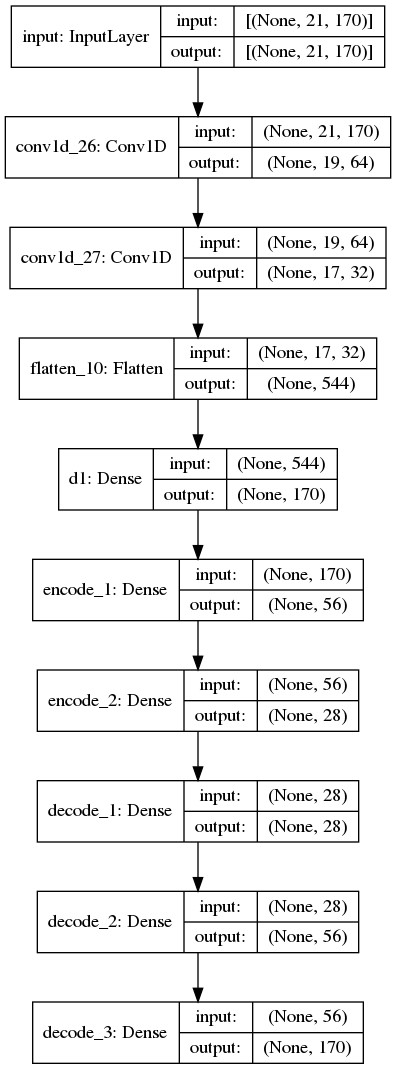

In [310]:
autoencoder_20, encoder_20 = model_2(170)
tf.keras.utils.plot_model(autoencoder_20, to_file="autoencoder20.png", show_shapes=True)

In [ ]:
def train_model_2(model_input, autoencoder, encoder):
    
#     autoencoder, encoder = build_model(d)
    
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    
    autoencoder.fit(model_input, model_input,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                   )
    
    denoised_signal = autoencoder.predict(model_input)

    return autoencoder, encoder, denoised_signal

In [311]:
autoencoder_21, encoder_21, recon_sig = train_model(denoised_signal_3, autoencoder_20, encoder_20)

/home/suraj/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/1000


InvalidArgumentError:  Incompatible shapes: [16,21,170] vs. [16,170]
	 [[node mean_squared_error/SquaredDifference (defined at /home/suraj/anaconda3/lib/python3.8/site-packages/keras/losses.py:1202) ]] [Op:__inference_train_function_323693]

Errors may have originated from an input operation.
Input Source operations connected to node mean_squared_error/SquaredDifference:
 IteratorGetNext (defined at /home/suraj/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:819)	
 model_43/decode_3/Relu (defined at /home/suraj/anaconda3/lib/python3.8/site-packages/keras/backend.py:4700)

Function call stack:
train_function


In [318]:
def model_3(d):
    def build_encoder_model(d, input_embb):
        encoded = layers.Dense(int(d/8), activation='relu', activity_regularizer=regularizers.l1(10e-5), name='encode_1')(input_embb)
#         encoded = layers.Dense(int(d/4), activation='relu', activity_regularizer=regularizers.l1(10e-5), name='encode_2')(encoded)    
#         encoded = layers.Dense(int(d/8), activation='relu', activity_regularizer=regularizers.l1(10e-5), name='encode_3')(encoded)
    
        return encoded
    
    
    def build_decoder_model(encoded, d):
        decoded = layers.Dense(int(d/8), activation='relu', name='decode_1')(encoded)
#         decoded = layers.Dense(int(d/4), activation='relu', name='decode_2')(decoded)
#         decoded = layers.Dense(int(d/2), activation='relu', name='decode_3')(decoded)        
        decoded = layers.Dense(d, activation='relu', name='decode_4')(decoded)
    
        return decoded

    
    input_embb_1 = keras.Input(shape=(21,170,), name='input')
    
    encoded_1 = build_encoder_model(d, input_embb_1)
    
    shared = layers.Dense(int(d/16), activation='relu', name='shared')(encoded_1)
    shared_1 = layers.Dense(int(d/90), activation='relu', name='shared_1')(shared)
    shared_2 = layers.Dense(int(d/16), activation='relu', name='shared_2')(shared_1)
    
    decoded_1 = build_decoder_model(shared_2, d)
    
    autoencoder = keras.Model(input_embb_1, decoded_1)
        
    encoder = keras.Model(input_embb_1,
                          shared_1)
    
    return autoencoder, encoder


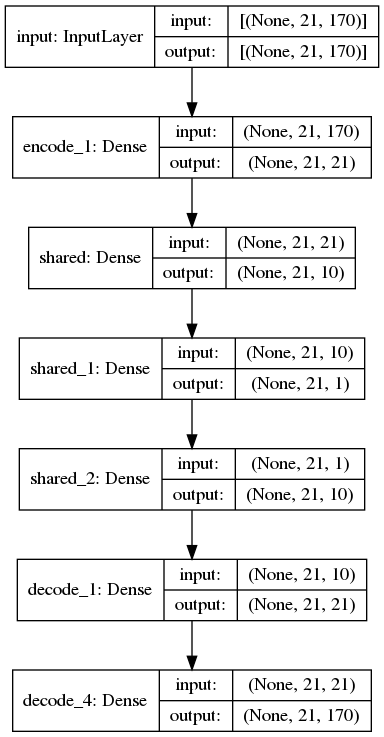

In [319]:
autoencoder_30, encoder_30 = model_3(170)
tf.keras.utils.plot_model(autoencoder_30, to_file="autoencoder30.png", show_shapes=True)

In [320]:
autoencoder_30.summary()

Model: "model_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 21, 170)]         0         
_________________________________________________________________
encode_1 (Dense)             (None, 21, 21)            3591      
_________________________________________________________________
shared (Dense)               (None, 21, 10)            220       
_________________________________________________________________
shared_1 (Dense)             (None, 21, 1)             11        
_________________________________________________________________
shared_2 (Dense)             (None, 21, 10)            20        
_________________________________________________________________
decode_1 (Dense)             (None, 21, 21)            231       
_________________________________________________________________
decode_4 (Dense)             (None, 21, 170)           374

In [322]:
denoised_signal_3.shape

(900, 21, 170)

In [325]:
autoencoder_31, encoder_31, recon_sig = train_model(denoised_signal_3, autoencoder_30, encoder_30)

Epoch 1/1000
57/57 [==============================] - 4s 17ms/step - loss: 0.2183
Epoch 2/1000
57/57 [==============================] - 0s 7ms/step - loss: 0.1458
Epoch 3/1000
57/57 [==============================] - 0s 9ms/step - loss: 0.1390
Epoch 4/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.1357
Epoch 5/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.1316
Epoch 6/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.1304
Epoch 7/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.1298
Epoch 8/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.1281
Epoch 9/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.1231
Epoch 10/1000
57/57 [==============================] - 0s 5ms/step - loss: 0.1224
Epoch 11/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.1068
Epoch 12/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0944
Epoch 13/1000
57/57 [===

Epoch 101/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 102/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 103/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 104/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 105/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 106/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 107/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 108/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 109/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 110/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 111/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 112/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoc

57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 298/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0538
Epoch 299/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 300/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0523
Epoch 301/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0520
Epoch 302/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 303/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 304/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 305/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 306/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 307/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0516
Epoch 308/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 309/1000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 494/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 495/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 496/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 497/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 498/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 499/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 500/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 501/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 502/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 503/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 504/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 505/1000
57/5

57/57 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 690/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 691/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 692/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 693/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 694/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 695/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 696/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 697/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 698/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 699/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 700/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 701/1000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 886/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.0431
Epoch 887/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0432
Epoch 888/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.0431
Epoch 889/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 890/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.0431
Epoch 891/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 892/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.0433
Epoch 893/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 894/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 895/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0433
Epoch 896/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 897/1000
57/5

In [417]:
autoencoder_31.fit(x1, x1,
                epochs=2000,
                batch_size=16,
                shuffle=False,
                   )

Epoch 1/2000
57/57 [==============================] - 1s 7ms/step - loss: 0.0817
Epoch 2/2000
57/57 [==============================] - 0s 6ms/step - loss: 0.0771
Epoch 3/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0766
Epoch 4/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0764
Epoch 5/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0763
Epoch 6/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0761
Epoch 7/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0760
Epoch 8/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0759
Epoch 9/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0758
Epoch 10/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0757
Epoch 11/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0756
Epoch 12/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0755
Epoch 13/2000
57/57 [====

57/57 [==============================] - 0s 4ms/step - loss: 0.0705
Epoch 102/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0705
Epoch 103/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0705
Epoch 104/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0705
Epoch 105/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0704
Epoch 106/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 107/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 108/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0694
Epoch 109/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0693
Epoch 110/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0692
Epoch 111/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 112/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0692
Epoch 113/2000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0619
Epoch 298/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0623
Epoch 299/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0622
Epoch 300/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0617
Epoch 301/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0617
Epoch 302/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0616
Epoch 303/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0623
Epoch 304/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0623
Epoch 305/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0621
Epoch 306/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0621
Epoch 307/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0621
Epoch 308/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0625
Epoch 309/2000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 494/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 495/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 496/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 497/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 498/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 499/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 500/2000
57/57 [==============================] - 0s 6ms/step - loss: 0.0552
Epoch 501/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 502/2000
57/57 [==============================] - 0s 6ms/step - loss: 0.0551
Epoch 503/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 504/2000
57/57 [==============================] - 0s 6ms/step - loss: 0.0551
Epoch 505/2000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 690/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0547
Epoch 691/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 692/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0543
Epoch 693/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 694/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0543
Epoch 695/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 696/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 697/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 698/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0541
Epoch 699/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 700/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0540
Epoch 701/2000
57/5

57/57 [==============================] - 0s 4ms/step - loss: 0.0538
Epoch 886/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 887/2000
57/57 [==============================] - 0s 5ms/step - loss: 0.0535
Epoch 888/2000
57/57 [==============================] - 0s 5ms/step - loss: 0.0536
Epoch 889/2000
57/57 [==============================] - 0s 6ms/step - loss: 0.0538
Epoch 890/2000
57/57 [==============================] - 0s 5ms/step - loss: 0.0540
Epoch 891/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 892/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0538
Epoch 893/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 894/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0538
Epoch 895/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 896/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 897/2000
57/5

57/57 [==============================] - 0s 5ms/step - loss: 0.0535
Epoch 1081/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1082/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1083/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 1084/2000
57/57 [==============================] - 0s 5ms/step - loss: 0.0536
Epoch 1085/2000
57/57 [==============================] - 0s 6ms/step - loss: 0.0535
Epoch 1086/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1087/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0538
Epoch 1088/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1089/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 1090/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 1091/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 10

57/57 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1275/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0536
Epoch 1276/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 1277/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 1278/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 1279/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 1280/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 1281/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0536
Epoch 1282/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0536
Epoch 1283/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1284/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0536
Epoch 1285/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 12

57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 1469/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0543
Epoch 1470/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 1471/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1472/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0538
Epoch 1473/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 1474/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 1475/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 1476/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0536
Epoch 1477/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 1478/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1479/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 14

57/57 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 1663/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 1664/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 1665/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 1666/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0505
Epoch 1667/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 1668/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 1669/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 1670/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 1671/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 1672/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 1673/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0505
Epoch 16

57/57 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 1857/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 1858/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 1859/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 1860/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 1861/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 1862/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 1863/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 1864/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 1865/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 1866/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 1867/2000
57/57 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 18

In [ ]:
recon_sig_1 = autoencoder_31.predict(denoised_signal_3)

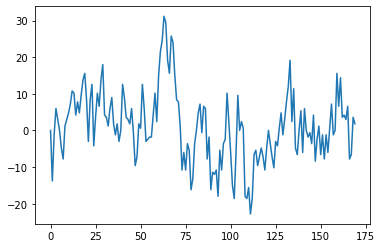

In [326]:
plt.plot(np.arange(170),frame_of_1[0][0])

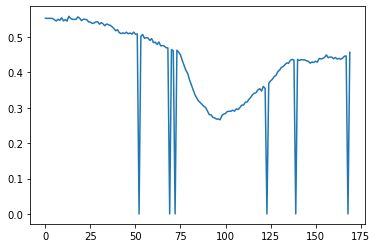

In [328]:
plt.plot(np.arange(170),denoised_signal_3[0][0])

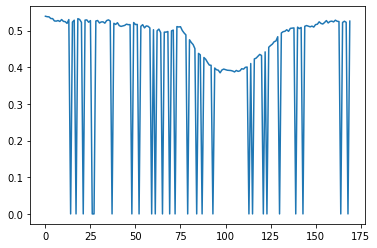

In [329]:
plt.plot(np.arange(170),recon_sig[0][0])

In [330]:
features = encoder_30.predict(denoised_signal_3)

In [331]:
features.shape

(900, 21, 1)

In [332]:
f1 = features.reshape((900, 21))
f1.shape

(900, 21)

In [339]:
frame_of_3.shape

(284, 21, 170)

In [347]:
dataset = pd.DataFrame(f1)
dataset['label'] = 0
dataset.loc[:289, 'label'] = 1
dataset.loc[289:616, 'label'] = 2
dataset.loc[616:, 'label'] = 3
dataset

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,0.411532,0.449555,0.548962,0.532604,0.389214,0.506619,0.308937,0.495010,0.438991,0.636620,...,0.375758,0.624308,0.442734,0.582961,0.423111,0.614655,0.614871,0.576042,0.476420,1
1,0.391546,0.341020,0.448686,0.359490,0.453315,0.411530,0.499276,0.642134,0.391831,0.436987,...,0.524314,0.375968,0.567881,0.439341,0.480935,0.501581,0.329156,0.605152,0.567904,1
2,0.587969,0.626106,0.525905,0.338453,0.550570,0.275880,0.579495,0.629968,0.568701,0.633382,...,0.641969,0.497815,0.608574,0.531446,0.558257,0.629728,0.501631,0.693630,0.673471,1
3,0.443602,0.488374,0.409182,0.376663,0.468761,0.328152,0.547387,0.515021,0.517983,0.501739,...,0.383873,0.477831,0.512733,0.424100,0.525335,0.595190,0.505499,0.635977,0.402700,1
4,0.554966,0.484596,0.490730,0.520617,0.489792,0.317680,0.616275,0.614464,0.548343,0.512512,...,0.515567,0.588514,0.462804,0.581275,0.681697,0.599944,0.589627,0.579485,0.552632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.016711,0.010260,0.073483,0.076151,0.444696,0.420359,0.706600,0.646707,0.667576,0.656342,...,0.096010,0.016842,0.692256,0.599669,0.773653,0.819330,0.059463,0.320142,0.703112,3
896,0.416044,0.400079,0.328623,0.337577,0.515029,0.406389,0.650517,0.443718,0.497029,0.459194,...,0.427540,0.373927,0.383901,0.342824,0.530807,0.496595,0.355639,0.552687,0.465616,3
897,0.562934,0.430483,0.356924,0.341772,0.483365,0.315865,0.634300,0.661674,0.666937,0.601446,...,0.555279,0.474067,0.629480,0.550172,0.709142,0.622855,0.294225,0.376577,0.601377,3
898,0.337991,0.286965,0.467674,0.419276,0.503358,0.322349,0.430291,0.380443,0.344457,0.251763,...,0.428336,0.292972,0.518388,0.378770,0.602756,0.275880,0.464744,0.466885,0.359129,3


In [348]:
from sklearn.model_selection import train_test_split

In [367]:
train, test = train_test_split(dataset, test_size=0.2, shuffle=True, random_state=0)

In [368]:
train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
304,0.597495,0.498426,0.459462,0.393270,0.366822,0.442585,0.345825,0.345176,0.307718,0.407250,...,0.513734,0.344307,0.443251,0.319984,0.429940,0.509897,0.436713,0.538519,0.339647,2
831,0.191592,0.178161,0.241290,0.225425,0.683820,0.237928,0.657223,0.852776,0.822089,0.780007,...,0.227722,0.205652,0.730613,0.501553,0.839530,0.733224,0.212549,0.275880,0.577841,3
240,0.540159,0.535300,0.275880,0.380315,0.414071,0.385605,0.340819,0.476021,0.469408,0.628577,...,0.405314,0.541957,0.471184,0.684712,0.431747,0.630629,0.420128,0.708463,0.470656,1
1,0.391546,0.341020,0.448686,0.359490,0.453315,0.411530,0.499276,0.642134,0.391831,0.436987,...,0.524314,0.375968,0.567881,0.439341,0.480935,0.501581,0.329156,0.605152,0.567904,1
439,0.492042,0.433593,0.542063,0.425068,0.425900,0.435881,0.387306,0.374653,0.482341,0.275880,...,0.403302,0.359749,0.307082,0.358606,0.408613,0.416052,0.554036,0.580989,0.441952,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.421579,0.459456,0.275880,0.370955,0.436583,0.352149,0.514605,0.605414,0.600477,0.487202,...,0.286183,0.309607,0.403302,0.341988,0.707214,0.568927,0.277364,0.486072,0.571354,3
192,0.558289,0.459454,0.635688,0.582027,0.543406,0.405282,0.406609,0.574829,0.569681,0.667799,...,0.663128,0.511780,0.636681,0.598914,0.456602,0.612562,0.634005,0.671830,0.413047,1
629,0.014336,0.037172,0.070830,0.043360,0.558069,0.299861,0.851784,0.751792,0.841852,0.780821,...,0.316083,0.025638,0.654046,0.421223,0.820407,0.677962,0.054624,0.331044,0.795487,3
559,0.397608,0.363833,0.431180,0.275880,0.572116,0.275880,0.746153,0.683651,0.555676,0.523042,...,0.573720,0.275880,0.420898,0.275880,0.587191,0.488445,0.275880,0.590182,0.705069,2


In [369]:
test = test.reset_index(drop=True)

In [370]:
test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,0.381721,0.275880,0.493109,0.275880,0.554957,0.343114,0.396181,0.602253,0.394747,0.551982,...,0.409502,0.206138,0.301688,0.252463,0.402437,0.555604,0.405464,0.699186,0.431916,2
1,0.500993,0.599842,0.572928,0.582642,0.376155,0.366430,0.361374,0.394825,0.332888,0.349916,...,0.620511,0.752732,0.589791,0.685570,0.396899,0.583126,0.617444,0.323205,0.235869,1
2,0.510717,0.387253,0.488451,0.420213,0.488748,0.358190,0.498280,0.556229,0.536528,0.633164,...,0.441572,0.378377,0.463180,0.510340,0.374039,0.461851,0.509620,0.505121,0.639993,2
3,0.275880,0.275880,0.467003,0.369074,0.378574,0.539529,0.472875,0.510235,0.455751,0.450313,...,0.404157,0.393772,0.415600,0.401784,0.477068,0.415497,0.455368,0.479449,0.631026,1
4,0.377172,0.439901,0.394159,0.571413,0.612882,0.412429,0.580401,0.488218,0.460392,0.340830,...,0.385145,0.493202,0.286882,0.343318,0.465326,0.415844,0.432404,0.486547,0.465688,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.275880,0.275880,0.297247,0.318781,0.222780,0.724237,0.475630,0.587171,0.364595,0.496076,...,0.275880,0.354051,0.362386,0.579045,0.386330,0.578845,0.275880,0.378297,0.501703,2
176,0.337120,0.296912,0.360413,0.470585,0.381652,0.459908,0.245855,0.535926,0.265776,0.384004,...,0.275880,0.356173,0.255911,0.361306,0.206458,0.258062,0.442663,0.649796,0.430329,1
177,0.017825,0.022832,0.062755,0.032603,0.724940,0.275880,0.726218,0.730944,0.735371,0.774591,...,0.262896,0.048627,0.827128,0.660211,0.711255,0.803301,0.032098,0.454326,0.721407,3
178,0.571529,0.596545,0.479180,0.489418,0.384243,0.506579,0.376038,0.451232,0.639618,0.715902,...,0.616344,0.528064,0.449865,0.518651,0.498082,0.602199,0.485909,0.618390,0.331743,1


In [371]:
X_train = train[train.columns[:-1]]
y_train = train['label']

X_test = test[test.columns[:-1]]
y_test = test['label']

In [372]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
304,0.597495,0.498426,0.459462,0.393270,0.366822,0.442585,0.345825,0.345176,0.307718,0.407250,...,0.470140,0.513734,0.344307,0.443251,0.319984,0.429940,0.509897,0.436713,0.538519,0.339647
831,0.191592,0.178161,0.241290,0.225425,0.683820,0.237928,0.657223,0.852776,0.822089,0.780007,...,0.783840,0.227722,0.205652,0.730613,0.501553,0.839530,0.733224,0.212549,0.275880,0.577841
240,0.540159,0.535300,0.275880,0.380315,0.414071,0.385605,0.340819,0.476021,0.469408,0.628577,...,0.725201,0.405314,0.541957,0.471184,0.684712,0.431747,0.630629,0.420128,0.708463,0.470656
1,0.391546,0.341020,0.448686,0.359490,0.453315,0.411530,0.499276,0.642134,0.391831,0.436987,...,0.520764,0.524314,0.375968,0.567881,0.439341,0.480935,0.501581,0.329156,0.605152,0.567904
439,0.492042,0.433593,0.542063,0.425068,0.425900,0.435881,0.387306,0.374653,0.482341,0.275880,...,0.284707,0.403302,0.359749,0.307082,0.358606,0.408613,0.416052,0.554036,0.580989,0.441952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.421579,0.459456,0.275880,0.370955,0.436583,0.352149,0.514605,0.605414,0.600477,0.487202,...,0.358548,0.286183,0.309607,0.403302,0.341988,0.707214,0.568927,0.277364,0.486072,0.571354
192,0.558289,0.459454,0.635688,0.582027,0.543406,0.405282,0.406609,0.574829,0.569681,0.667799,...,0.657919,0.663128,0.511780,0.636681,0.598914,0.456602,0.612562,0.634005,0.671830,0.413047
629,0.014336,0.037172,0.070830,0.043360,0.558069,0.299861,0.851784,0.751792,0.841852,0.780821,...,0.814933,0.316083,0.025638,0.654046,0.421223,0.820407,0.677962,0.054624,0.331044,0.795487
559,0.397608,0.363833,0.431180,0.275880,0.572116,0.275880,0.746153,0.683651,0.555676,0.523042,...,0.389677,0.573720,0.275880,0.420898,0.275880,0.587191,0.488445,0.275880,0.590182,0.705069


In [373]:
y_train

304    2
831    3
240    1
1      1
439    2
      ..
835    3
192    1
629    3
559    2
684    3
Name: label, Length: 720, dtype: int64

In [374]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.381721,0.275880,0.493109,0.275880,0.554957,0.343114,0.396181,0.602253,0.394747,0.551982,...,0.270994,0.409502,0.206138,0.301688,0.252463,0.402437,0.555604,0.405464,0.699186,0.431916
1,0.500993,0.599842,0.572928,0.582642,0.376155,0.366430,0.361374,0.394825,0.332888,0.349916,...,0.697108,0.620511,0.752732,0.589791,0.685570,0.396899,0.583126,0.617444,0.323205,0.235869
2,0.510717,0.387253,0.488451,0.420213,0.488748,0.358190,0.498280,0.556229,0.536528,0.633164,...,0.513190,0.441572,0.378377,0.463180,0.510340,0.374039,0.461851,0.509620,0.505121,0.639993
3,0.275880,0.275880,0.467003,0.369074,0.378574,0.539529,0.472875,0.510235,0.455751,0.450313,...,0.593464,0.404157,0.393772,0.415600,0.401784,0.477068,0.415497,0.455368,0.479449,0.631026
4,0.377172,0.439901,0.394159,0.571413,0.612882,0.412429,0.580401,0.488218,0.460392,0.340830,...,0.377062,0.385145,0.493202,0.286882,0.343318,0.465326,0.415844,0.432404,0.486547,0.465688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.275880,0.275880,0.297247,0.318781,0.222780,0.724237,0.475630,0.587171,0.364595,0.496076,...,0.646656,0.275880,0.354051,0.362386,0.579045,0.386330,0.578845,0.275880,0.378297,0.501703
176,0.337120,0.296912,0.360413,0.470585,0.381652,0.459908,0.245855,0.535926,0.265776,0.384004,...,0.175165,0.275880,0.356173,0.255911,0.361306,0.206458,0.258062,0.442663,0.649796,0.430329
177,0.017825,0.022832,0.062755,0.032603,0.724940,0.275880,0.726218,0.730944,0.735371,0.774591,...,0.881251,0.262896,0.048627,0.827128,0.660211,0.711255,0.803301,0.032098,0.454326,0.721407
178,0.571529,0.596545,0.479180,0.489418,0.384243,0.506579,0.376038,0.451232,0.639618,0.715902,...,0.687754,0.616344,0.528064,0.449865,0.518651,0.498082,0.602199,0.485909,0.618390,0.331743


In [375]:
y_test

0      2
1      1
2      2
3      1
4      2
      ..
175    2
176    1
177    3
178    1
179    1
Name: label, Length: 180, dtype: int64

In [376]:
np.array(X_test).shape

(180, 21)

# SVM (Support vector machine)

In [377]:
train_acc, test_acc, predicted_test, confusion, report = SVM_ml(X_train, y_train, X_test, y_test)

In [378]:
print(train_acc)
print(test_acc)

0.7027777777777777
0.5611111111111111


In [379]:
print(confusion)

[[33 14  7]
 [20 34 11]
 [13 14 34]]


In [380]:
print(report)

              precision    recall  f1-score   support

           1       0.50      0.61      0.55        54
           2       0.55      0.52      0.54        65
           3       0.65      0.56      0.60        61

    accuracy                           0.56       180
   macro avg       0.57      0.56      0.56       180
weighted avg       0.57      0.56      0.56       180



# Decision Tree

In [381]:
train_acc, test_acc, predicted_test, confusion, report = dTree_ml(X_train, y_train, X_test, y_test)

In [382]:
print(train_acc)
print(test_acc)

0.6569444444444444
0.5166666666666667


In [383]:
print(confusion)

[[32 20  2]
 [28 34  3]
 [15 19 27]]


In [384]:
print(report)

              precision    recall  f1-score   support

           1       0.43      0.59      0.50        54
           2       0.47      0.52      0.49        65
           3       0.84      0.44      0.58        61

    accuracy                           0.52       180
   macro avg       0.58      0.52      0.52       180
weighted avg       0.58      0.52      0.52       180



# Random Forest

In [385]:
train_acc, test_acc, predicted_test, confusion, report = rforest_ml(X_train, y_train, X_test, y_test)

In [386]:
print(train_acc)
print(test_acc)

1.0
0.5277777777777778


In [387]:
print(confusion)

[[31 21  2]
 [23 33  9]
 [10 20 31]]


In [388]:
print(report)

              precision    recall  f1-score   support

           1       0.48      0.57      0.53        54
           2       0.45      0.51      0.47        65
           3       0.74      0.51      0.60        61

    accuracy                           0.53       180
   macro avg       0.56      0.53      0.53       180
weighted avg       0.56      0.53      0.53       180



# AdaBoosting

In [389]:
train_acc, test_acc, predicted_test, confusion, report = adaBoost_ml(X_train, y_train, X_test, y_test)

In [390]:
print(train_acc)
print(test_acc)

0.7236111111111111
0.5277777777777778


In [391]:
print(confusion)

[[22 24  8]
 [15 33 17]
 [11 10 40]]


In [392]:
print(report)

              precision    recall  f1-score   support

           1       0.46      0.41      0.43        54
           2       0.49      0.51      0.50        65
           3       0.62      0.66      0.63        61

    accuracy                           0.53       180
   macro avg       0.52      0.52      0.52       180
weighted avg       0.52      0.53      0.53       180



# Bagging

In [393]:
train_acc, test_acc, predicted_test, confusion, report = bagging_ml(X_train, y_train, X_test, y_test)

In [394]:
print(train_acc)
print(test_acc)

0.9861111111111112
0.5611111111111111


In [395]:
print(confusion)

[[34 17  3]
 [18 41  6]
 [17 18 26]]


In [396]:
print(report)

              precision    recall  f1-score   support

           1       0.49      0.63      0.55        54
           2       0.54      0.63      0.58        65
           3       0.74      0.43      0.54        61

    accuracy                           0.56       180
   macro avg       0.59      0.56      0.56       180
weighted avg       0.59      0.56      0.56       180



# NB_classifier

## Gaussian_NB

In [397]:
train_acc, test_acc, predicted_test, confusion, report = gaussianNB_ml(X_train, y_train, X_test, y_test)

In [398]:
print(train_acc)
print(test_acc)

0.5347222222222222
0.4722222222222222


In [399]:
print(confusion)

[[18 33  3]
 [17 42  6]
 [15 21 25]]


In [400]:
print(report)

              precision    recall  f1-score   support

           1       0.36      0.33      0.35        54
           2       0.44      0.65      0.52        65
           3       0.74      0.41      0.53        61

    accuracy                           0.47       180
   macro avg       0.51      0.46      0.46       180
weighted avg       0.52      0.47      0.47       180



## Bernoulli_NB

In [401]:
train_acc, test_acc, predicted_test, confusion, report = bernoulliNB_ml(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [402]:
print(train_acc)
print(test_acc)

0.3638888888888889
0.3611111111111111


In [403]:
print(confusion)

[[ 0 54  0]
 [ 0 65  0]
 [ 0 61  0]]


In [404]:
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        54
           2       0.36      1.00      0.53        65
           3       0.00      0.00      0.00        61

    accuracy                           0.36       180
   macro avg       0.12      0.33      0.18       180
weighted avg       0.13      0.36      0.19       180



# MLP (Multi Layer perceptron) classifier

In [405]:
train_acc, test_acc, predicted_test, confusion, report = MLP_ml(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [406]:
print(train_acc)
print(test_acc)

0.6305555555555555
0.6333333333333333


In [407]:
print(confusion)

[[31 15  8]
 [14 42  9]
 [10 10 41]]


In [408]:
print(report)

              precision    recall  f1-score   support

           1       0.56      0.57      0.57        54
           2       0.63      0.65      0.64        65
           3       0.71      0.67      0.69        61

    accuracy                           0.63       180
   macro avg       0.63      0.63      0.63       180
weighted avg       0.64      0.63      0.63       180



# Quadratic Discriminant Analysis

In [409]:
train_acc, test_acc, predicted_test, confusion, report = QDA_ml(X_train, y_train, X_test, y_test)

In [410]:
print(train_acc)
print(test_acc)

0.7291666666666666
0.5277777777777778


In [411]:
print(confusion)

[[24 26  4]
 [14 37 14]
 [ 6 21 34]]


In [412]:
print(report)

              precision    recall  f1-score   support

           1       0.55      0.44      0.49        54
           2       0.44      0.57      0.50        65
           3       0.65      0.56      0.60        61

    accuracy                           0.53       180
   macro avg       0.55      0.52      0.53       180
weighted avg       0.54      0.53      0.53       180



# KNN

In [413]:
train_acc, test_acc, predicted_test, confusion, report = KNN_ml(X_train, y_train, X_test, y_test)

In [414]:
print(train_acc)
print(test_acc)

0.7305555555555555
0.4722222222222222


In [415]:
print(confusion)

[[26 22  6]
 [26 31  8]
 [20 13 28]]


In [416]:
print(report)

              precision    recall  f1-score   support

           1       0.36      0.48      0.41        54
           2       0.47      0.48      0.47        65
           3       0.67      0.46      0.54        61

    accuracy                           0.47       180
   macro avg       0.50      0.47      0.48       180
weighted avg       0.50      0.47      0.48       180



In [254]:
def despike(yi, th=1.e-20):
    '''Remove spike from array yi, the spike area is where the difference between 
    the neigboring points is higher than th.'''
    y = np.copy(yi) # use y = y1 if it is OK to modify input array
    n = len(y)
    x = np.arange(n)
    c = np.argmax(y)
    d = abs(np.diff(y))
    try:
        l = c - 1 - np.where(d[c-1::-1]<th)[0][0]
        r = c + np.where(d[c:]<th)[0][0] + 1
    except: # no spike, return unaltered array
        return y
    # for fit, use area twice wider then the spike
    if (r-l) <= 3:
        l -= 1
        r += 1
    s = int(round((r-l)/2.))
    lx = l - s
    rx = r + s
    # make a gap at spike area
    xgapped = np.concatenate((x[lx:l],x[r:rx]))
    ygapped = np.concatenate((y[lx:l],y[r:rx]))
    # quadratic fit of the gapped array
    z = np.polyfit(xgapped,ygapped,2)
    p = np.poly1d(z)
    y[l:r] = p(x[l:r])
    return y


In [255]:
a = []
for trail in denoised_signal_3:
    b = []
    for electrode in trail:
        y = despike(electrode)
        b.append(y)
    a.append(b)
    
a1 = np.array(a)

In [256]:
a1.shape

(900, 21, 170)

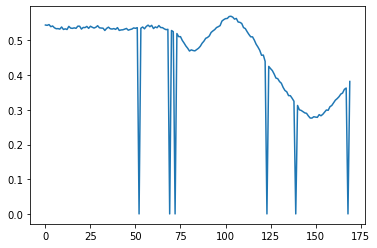

In [257]:
plt.plot(np.arange(170),a1[0][5])

In [231]:
high_pass_filter = signal.butter(2, (0.05,0.08),btype= 'bandpass', output='sos')

In [232]:
f = signal.sosfilt(high_pass_filter, denoised_signal_3, axis=-1)

In [233]:
f.shape

(900, 21, 170)

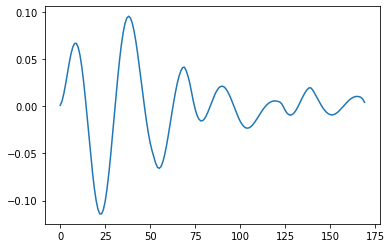

In [234]:
plt.plot(np.arange(170),f[0][5])

In [10]:
low_pass_filter = design_filter(8, 200, 5)

In [11]:
f_signal_1 = apply_filter(low_pass_filter, frame_of_1)
f_signal_2 = apply_filter(low_pass_filter, frame_of_2)
f_signal_3 = apply_filter(low_pass_filter, frame_of_3)

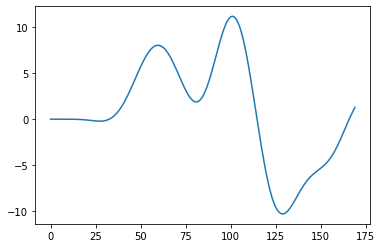

In [12]:
plt.plot(np.arange(170),f_signal_1[0][0])

In [13]:
transformed_frame_of_1 = fourier_trans(f_signal_1)
transformed_frame_of_2 = fourier_trans(f_signal_2)
transformed_frame_of_3 = fourier_trans(f_signal_3)

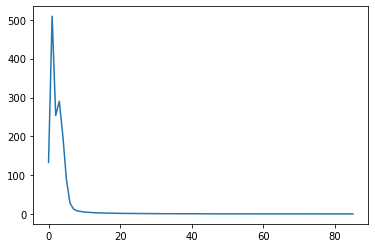

In [14]:
plt.plot(abs(transformed_frame_of_1[0][0]))

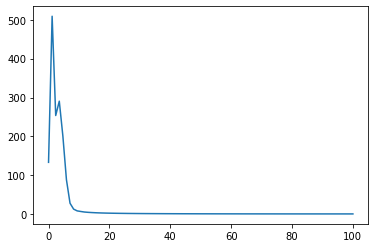

In [15]:
yf = transformed_frame_of_1[0][0]
v = np.arange(86)
t = 170/200.0
xf = v/t

fig, ax = plt.subplots()
ax.plot(xf, abs(yf))
plt.show()


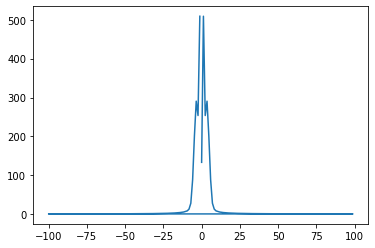

In [16]:
yf = fft.fft(f_signal_1, axis=2)
yf = yf[0][0]
xf = fft.fftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

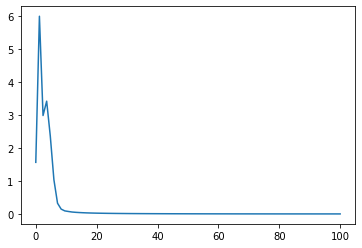

In [17]:
yf = fft.fft(f_signal_1, axis=2)
yf = yf[0][0]
xf = np.linspace(0.0, 1.0/(2.0*(1.0/200.0)), 85)
                 
fig, ax = plt.subplots()
ax.plot(xf, (2.0/170) * np.abs(yf[0:85]))
plt.show()

In [18]:
transformed_frame_of_1 = remove_phase_shift(transformed_frame_of_1)
transformed_frame_of_2 = remove_phase_shift(transformed_frame_of_2)
transformed_frame_of_3 = remove_phase_shift(transformed_frame_of_3)

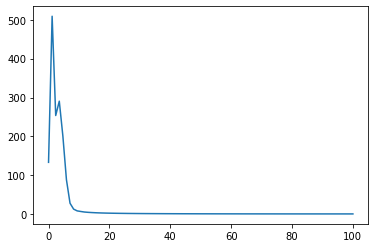

In [19]:
yf = transformed_frame_of_1[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

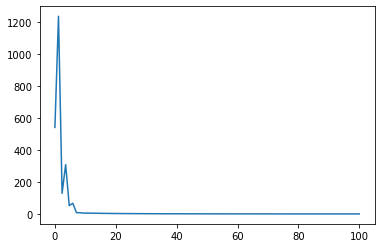

In [20]:
yf = transformed_frame_of_2[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

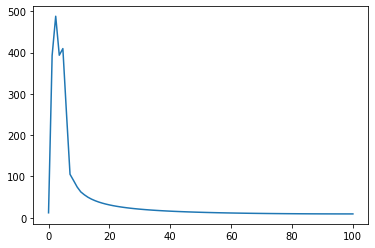

In [21]:
yf = transformed_frame_of_3[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

In [22]:
all_trials_of_1 = extract_features(transformed_frame_of_1)
all_trials_of_2 = extract_features(transformed_frame_of_2)
all_trials_of_3 = extract_features(transformed_frame_of_3)

In [23]:
print(all_trials_of_1.shape)
print(all_trials_of_2.shape)
print(all_trials_of_3.shape)

(289, 189)
(327, 189)
(284, 189)


In [24]:
trials_sets = [all_trials_of_1, all_trials_of_2, all_trials_of_3]
class_labels = [1, 2, 3]
dataset = create_dataset(trials_sets, class_labels)

In [25]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,1.333233e+02,-3.951829e+02,-3.206725e+02,2.192320e+02,-1.276870e+02,2.002779e+02,2.105060e+02,-1.684008e+02,-1.097830e+02,2.030456e+02,...,-1.523644e+02,-5.061767e+01,-3.428006e+01,1.088685e+02,-7.414298e+01,1.229984e+01,-9.757946e+00,9.755409e+00,2.082776e+01,1
1,-4.249005e-76,4.218955e-27,-1.790195e-26,5.052471e-02,-1.974817e-02,7.928239e-14,4.365613e-13,-3.289360e-138,2.968595e-139,-4.418262e-76,...,1.406481e-76,-5.272645e-120,5.507473e-120,-3.534495e-48,-2.263164e-48,-8.590548e-25,-7.391418e-24,9.806915e-01,2.397849e+00,1
2,6.704144e+02,-7.264173e-05,-1.042459e-04,3.135817e-18,8.763798e-19,2.423030e-07,5.605944e-07,5.033216e-48,-3.270632e-48,1.092715e+02,...,-1.875475e+02,-1.890315e-07,-2.702959e-07,-7.627075e-48,-4.769753e-48,2.030248e-02,-2.175795e-02,1.116670e-52,-1.820541e-52,1
3,1.139780e+03,-8.975985e-10,-1.884819e-10,-1.443137e-52,-6.643539e-53,4.697246e-06,2.564722e-06,9.735044e-44,-9.282512e-44,4.578123e+02,...,6.444420e-77,-4.735424e-125,3.248380e-125,1.469371e-17,-6.172572e-17,2.054551e-22,-7.760480e-21,5.618163e-25,4.757264e-26,1
4,-4.879283e-76,-6.696091e-18,-5.346614e-17,3.015551e-19,9.451781e-20,-3.069639e-82,-2.036983e-82,9.117520e-34,-2.143647e-33,-3.202739e-76,...,2.673062e-76,-6.168320e-127,3.533265e-127,5.163702e-24,-2.002391e-22,1.888514e-01,-1.273112e-01,-3.886308e-23,7.168544e-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,8.160103e+02,3.369514e-62,-9.834204e-63,2.976433e-30,1.391032e-30,1.028572e-22,7.814110e-23,3.361297e-05,4.433746e-05,1.038169e+03,...,8.992873e+00,-2.258477e-98,-2.094776e-99,-3.097044e-101,-4.440353e-101,-6.500338e-119,-8.079043e-120,-3.334961e-119,-6.570855e-119,3
896,-6.454930e-76,-1.459900e-30,-3.280767e-29,-8.473584e-22,-3.689807e-21,1.121079e+01,-3.319648e+00,1.703511e+02,1.240620e+02,-6.205268e-77,...,2.538225e+01,-5.813649e-21,1.979585e-20,-4.453816e-96,-1.031374e-95,-4.994613e-111,-2.244643e-111,-9.409541e-117,-2.451284e-116,3
897,-2.440752e-76,-7.431783e+01,-1.744032e+01,1.384663e-09,-5.263277e-09,1.020750e-15,-1.748020e-15,1.393947e-19,-3.017071e-20,-1.998171e-76,...,2.555589e+00,-1.366264e-67,-5.903653e-67,-2.557043e-17,1.285087e-17,-9.322752e-11,1.088560e-10,-3.908467e-110,-5.071616e-109,3
898,-8.833328e-76,2.124004e-44,-3.695109e-44,1.101446e-14,-1.437583e-13,1.061543e-25,-6.819383e-25,5.509879e-07,7.476768e-07,-2.672413e-76,...,-2.327198e-77,3.463369e-58,-1.933509e-57,2.035699e-47,-6.668103e-49,-1.145908e-09,1.472186e-09,2.037723e-38,5.850633e-38,3


In [26]:
f2 = "csvDatasets/" + file_name + ".csv"
dataset.to_csv(f2)
# !cp dataset.csv "/content/drive/MyDrive/IIT Delhi/HSL622_termPaper"

Apply different ML classification algorithms to dataset present in "dataset"
few implemented algorithms are here https://github.com/mrzResearchArena/MI-EEG/tree/master/Machine-Learning

In [27]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [28]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,6.668082e+02,-1.695469e-09,-3.544297e-09,1.014611e-47,7.106629e-47,5.188904e-12,2.156118e-11,-1.826036e-08,-3.248780e-09,3.380735e+02,...,-6.115749e+01,-9.414594e-10,-1.541395e-10,-2.382286e-32,-6.198004e-32,2.818072e-52,1.987865e-51,9.706677e-58,-2.520193e-57,1
1,-6.226801e-75,4.453153e-68,1.804469e-68,7.013827e-08,-9.634985e-08,-3.676030e-66,-1.001351e-65,-9.155489e-114,1.647757e-113,-5.577280e-75,...,7.497380e-76,8.746765e-97,4.364355e-96,-2.253734e-66,3.576287e-66,1.717160e-46,5.023628e-46,-6.488682e-29,6.786756e-29,1
2,3.693942e+03,1.469204e-77,5.449699e-78,2.380011e-34,1.692094e-34,2.517108e-30,3.662622e-30,4.377309e-13,1.297703e-12,3.392622e+03,...,-1.607978e-77,-6.253206e-30,8.166744e-30,-5.728147e-103,-6.876811e-103,-1.009635e-113,-3.275330e-114,-1.650857e-126,-1.691168e-126,3
3,-8.458635e-76,-2.230276e-18,-1.861589e-17,5.179621e+00,-2.444740e+00,8.634752e-29,-3.717157e-29,-1.376323e-104,1.397611e-103,-9.771233e-76,...,1.618081e-76,-1.158439e-02,-5.188563e-03,-1.995222e-87,3.360157e-88,-1.888566e-23,-4.142928e-22,5.044488e-44,-4.090115e-44,1
4,-2.440752e-76,-7.431783e+01,-1.744032e+01,1.384663e-09,-5.263277e-09,1.020750e-15,-1.748020e-15,1.393947e-19,-3.017071e-20,-1.998171e-76,...,2.555589e+00,-1.366264e-67,-5.903653e-67,-2.557043e-17,1.285087e-17,-9.322752e-11,1.088560e-10,-3.908467e-110,-5.071616e-109,3
5,5.846015e+02,-2.239370e-18,-4.208785e-18,8.852659e-49,1.973813e-48,-2.707745e-48,3.604120e-46,-5.899725e-62,-1.680865e-61,7.395902e+02,...,-2.410793e-76,4.306656e-58,-2.181553e-57,1.667252e-73,-2.985850e-73,2.047263e-64,-2.335563e-64,-3.933805e-29,7.627229e-28,3
6,-2.105693e-75,4.662736e-66,-6.195979e-67,4.701131e-07,-1.285994e-06,-9.150638e-31,-2.770389e-29,2.221660e-11,2.615663e-12,-2.113359e-75,...,-5.205977e-77,-6.455572e-86,-4.374334e-86,-1.574847e-97,-3.145375e-97,-9.308537e-94,-1.995549e-93,2.277090e-73,-4.751922e-74,3
7,-7.310937e-77,-1.931916e+02,-2.419751e+02,-1.971894e-56,-2.982614e-56,7.294974e-11,-1.669009e-12,5.310145e-35,-1.798316e-34,3.945275e+02,...,3.633178e+02,5.099797e-82,-6.790824e-82,-2.626973e-99,9.026879e-99,2.652088e-13,5.963449e-13,-1.848158e-01,3.284608e-02,2
8,3.522581e+02,-9.450339e+00,-1.054125e+01,1.791709e-03,7.351699e-04,6.135738e-05,1.439940e-05,7.551271e-31,4.187962e-30,8.275680e+02,...,1.058545e+01,4.834160e-28,1.394897e-27,3.387261e-22,-1.099440e-21,1.841216e-03,1.757468e-03,-8.521850e-01,1.302461e-01,2
9,-1.622929e-76,3.712947e-88,3.371100e-88,-2.898035e-64,1.831198e-63,-6.122873e-54,-3.894292e-54,-1.455239e-57,-1.207848e-56,-2.525847e-76,...,2.173627e+02,-1.989525e-42,8.499370e-43,-6.795864e-98,-1.279499e-97,-5.175449e-86,-5.958440e-85,3.903794e-105,-3.052017e-104,3


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train, test = train_test_split(dataset, test_size=0.2, shuffle=False, random_state=0)

In [31]:
train

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,6.668082e+02,-1.695469e-09,-3.544297e-09,1.014611e-47,7.106629e-47,5.188904e-12,2.156118e-11,-1.826036e-08,-3.248780e-09,3.380735e+02,...,-6.115749e+01,-9.414594e-10,-1.541395e-10,-2.382286e-32,-6.198004e-32,2.818072e-52,1.987865e-51,9.706677e-58,-2.520193e-57,1
1,-6.226801e-75,4.453153e-68,1.804469e-68,7.013827e-08,-9.634985e-08,-3.676030e-66,-1.001351e-65,-9.155489e-114,1.647757e-113,-5.577280e-75,...,7.497380e-76,8.746765e-97,4.364355e-96,-2.253734e-66,3.576287e-66,1.717160e-46,5.023628e-46,-6.488682e-29,6.786756e-29,1
2,3.693942e+03,1.469204e-77,5.449699e-78,2.380011e-34,1.692094e-34,2.517108e-30,3.662622e-30,4.377309e-13,1.297703e-12,3.392622e+03,...,-1.607978e-77,-6.253206e-30,8.166744e-30,-5.728147e-103,-6.876811e-103,-1.009635e-113,-3.275330e-114,-1.650857e-126,-1.691168e-126,3
3,-8.458635e-76,-2.230276e-18,-1.861589e-17,5.179621e+00,-2.444740e+00,8.634752e-29,-3.717157e-29,-1.376323e-104,1.397611e-103,-9.771233e-76,...,1.618081e-76,-1.158439e-02,-5.188563e-03,-1.995222e-87,3.360157e-88,-1.888566e-23,-4.142928e-22,5.044488e-44,-4.090115e-44,1
4,-2.440752e-76,-7.431783e+01,-1.744032e+01,1.384663e-09,-5.263277e-09,1.020750e-15,-1.748020e-15,1.393947e-19,-3.017071e-20,-1.998171e-76,...,2.555589e+00,-1.366264e-67,-5.903653e-67,-2.557043e-17,1.285087e-17,-9.322752e-11,1.088560e-10,-3.908467e-110,-5.071616e-109,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-7.133785e-76,-1.075055e-08,-2.064762e-08,5.121377e-24,-1.004464e-22,1.349210e-35,-1.112455e-35,5.805281e-64,3.779794e-65,-1.983598e-76,...,8.086938e-77,-6.521426e-123,5.378498e-123,-4.528963e-53,-1.746460e-53,-2.528894e-33,-4.872140e-33,-1.380640e-98,-3.909398e-99,1
716,-4.761799e-76,-2.298938e-10,-1.113415e-09,4.477250e-29,-7.917406e-29,1.520801e-12,2.557499e-12,-4.812878e-47,-2.115970e-46,-4.106668e-76,...,2.512017e+02,-3.226085e-14,1.392924e-13,-7.135711e+00,-9.151486e+00,2.154261e-43,-5.412026e-43,5.366070e-70,1.202748e-70,2
717,-1.209261e-75,1.427327e-69,1.030926e-69,1.926059e-18,-1.447426e-18,-8.116902e-62,-1.506385e-61,-6.596973e-47,1.313289e-46,-9.739234e-76,...,3.124439e+02,-1.313379e-116,-1.422154e-116,-6.808575e-123,2.308382e-123,3.865903e-11,7.066709e-11,-5.780467e-129,-8.916164e-129,2
718,-1.517515e-75,5.274610e-73,8.690943e-74,4.720569e-18,-2.497981e-19,2.530889e-02,-4.661234e-03,1.215101e-02,1.305992e-02,-1.516052e-75,...,1.124158e+02,1.533422e-02,1.579236e-02,-2.648290e-18,1.151496e-18,-3.398445e-107,-2.216739e-107,1.123204e-107,-2.645047e-106,3


In [32]:
test = test.reset_index(drop=True)

In [33]:
test

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,3.593688e+02,-5.456178e-04,-2.605996e-04,-1.571689e-38,-2.628046e-38,2.445257e-55,-1.875435e-54,1.068726e-59,-1.059530e-60,4.599835e+02,...,3.997473e-76,-4.285114e-135,8.693187e-136,2.099330e-50,1.692574e-49,-2.870769e-64,7.217798e-64,-5.133756e-87,-4.676280e-87,1
1,-2.567170e-76,-4.631603e-112,7.963715e-112,1.303834e-13,-2.819202e-13,3.830168e-29,-1.756795e-29,2.159153e-95,8.128064e-95,-1.539671e-76,...,1.170221e-76,2.329324e-86,3.493582e-86,-1.077423e-62,2.565145e-62,-1.228789e-92,4.601820e-94,-1.654776e-88,-1.294095e-88,1
2,9.383965e+02,6.496916e-76,1.826273e-76,6.579253e-28,2.390497e-28,4.187052e-18,2.126818e-18,1.017863e-07,1.683314e-07,7.515967e+02,...,-1.435912e-76,-1.291577e-80,-1.330478e-80,-1.544684e-118,-4.120164e-119,-7.160507e-99,-9.400457e-99,-8.625647e-123,-1.208445e-122,3
3,5.030667e+03,1.915799e-81,1.087732e-81,4.513685e-46,8.550859e-46,-2.641797e-48,2.895873e-47,-3.593596e-34,6.164213e-34,4.083558e+03,...,-3.015311e-76,4.883058e-61,-7.271003e-60,-1.503436e-89,-1.266861e-88,-2.030903e-92,-5.267643e-92,3.221929e-89,-3.601855e-89,3
4,-3.304967e-77,1.900251e-32,-2.316071e-32,1.062959e-14,1.129957e-14,4.333131e-07,4.509274e-07,2.398624e-15,2.325229e-15,3.948131e+02,...,3.098225e+02,2.785611e-88,-6.531620e-88,-2.509661e-114,1.997071e-114,3.651667e-13,8.221484e-13,-1.214995e-119,-7.917653e-119,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3.639018e+03,1.279077e-76,4.234456e-77,2.353994e-34,1.682578e-34,2.629061e-33,5.016211e-33,2.736131e-18,2.062907e-17,3.194424e+03,...,-4.975225e-76,9.844074e-54,-2.731795e-53,-8.620985e-107,-7.432299e-107,-1.469258e-94,-2.797716e-94,1.428593e-109,-4.966956e-107,3
176,4.995938e+02,-1.868868e-01,-2.001120e-01,7.287659e-03,-2.641052e-03,1.102811e+02,1.198934e+02,-1.277346e-116,1.873012e-116,-1.559252e-76,...,3.408122e-76,-1.397948e-06,-3.627409e-07,-4.049912e-60,1.458143e-59,4.268858e-12,-1.069007e-11,-3.658917e-73,-1.343538e-72,1
177,-5.069254e-76,5.285870e-68,1.974000e-68,2.353824e-13,2.034323e-14,-3.472911e-31,5.606585e-31,-1.314888e-121,1.244979e-121,-5.857127e-76,...,-6.034394e+01,-1.822185e-06,-4.946131e-07,-6.532477e-34,-1.379978e-33,1.147288e-17,-7.066183e-17,1.691055e-34,-5.376113e-35,1
178,5.471677e+01,-2.761631e-07,-1.627232e-07,-4.026148e-44,-7.994508e-43,1.077941e-06,1.468020e-07,-3.201690e-64,1.313129e-64,-9.341272e-77,...,5.973332e+02,-5.663269e-132,-1.006728e-132,4.256316e-74,4.750256e-74,-3.357267e-76,-2.402192e-76,-1.793362e-136,-1.474089e-136,2


In [34]:
X_train = train[train.columns[:-1]]
y_train = train['label']

X_test = test[test.columns[:-1]]
y_test = test['label']

In [35]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,6.668082e+02,-1.695469e-09,-3.544297e-09,1.014611e-47,7.106629e-47,5.188904e-12,2.156118e-11,-1.826036e-08,-3.248780e-09,3.380735e+02,...,1.082319e-42,-6.115749e+01,-9.414594e-10,-1.541395e-10,-2.382286e-32,-6.198004e-32,2.818072e-52,1.987865e-51,9.706677e-58,-2.520193e-57
1,-6.226801e-75,4.453153e-68,1.804469e-68,7.013827e-08,-9.634985e-08,-3.676030e-66,-1.001351e-65,-9.155489e-114,1.647757e-113,-5.577280e-75,...,-4.068900e+01,7.497380e-76,8.746765e-97,4.364355e-96,-2.253734e-66,3.576287e-66,1.717160e-46,5.023628e-46,-6.488682e-29,6.786756e-29
2,3.693942e+03,1.469204e-77,5.449699e-78,2.380011e-34,1.692094e-34,2.517108e-30,3.662622e-30,4.377309e-13,1.297703e-12,3.392622e+03,...,-3.849518e-13,-1.607978e-77,-6.253206e-30,8.166744e-30,-5.728147e-103,-6.876811e-103,-1.009635e-113,-3.275330e-114,-1.650857e-126,-1.691168e-126
3,-8.458635e-76,-2.230276e-18,-1.861589e-17,5.179621e+00,-2.444740e+00,8.634752e-29,-3.717157e-29,-1.376323e-104,1.397611e-103,-9.771233e-76,...,-2.103255e-33,1.618081e-76,-1.158439e-02,-5.188563e-03,-1.995222e-87,3.360157e-88,-1.888566e-23,-4.142928e-22,5.044488e-44,-4.090115e-44
4,-2.440752e-76,-7.431783e+01,-1.744032e+01,1.384663e-09,-5.263277e-09,1.020750e-15,-1.748020e-15,1.393947e-19,-3.017071e-20,-1.998171e-76,...,3.943420e-113,2.555589e+00,-1.366264e-67,-5.903653e-67,-2.557043e-17,1.285087e-17,-9.322752e-11,1.088560e-10,-3.908467e-110,-5.071616e-109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-7.133785e-76,-1.075055e-08,-2.064762e-08,5.121377e-24,-1.004464e-22,1.349210e-35,-1.112455e-35,5.805281e-64,3.779794e-65,-1.983598e-76,...,1.317134e-46,8.086938e-77,-6.521426e-123,5.378498e-123,-4.528963e-53,-1.746460e-53,-2.528894e-33,-4.872140e-33,-1.380640e-98,-3.909398e-99
716,-4.761799e-76,-2.298938e-10,-1.113415e-09,4.477250e-29,-7.917406e-29,1.520801e-12,2.557499e-12,-4.812878e-47,-2.115970e-46,-4.106668e-76,...,-5.371535e-05,2.512017e+02,-3.226085e-14,1.392924e-13,-7.135711e+00,-9.151486e+00,2.154261e-43,-5.412026e-43,5.366070e-70,1.202748e-70
717,-1.209261e-75,1.427327e-69,1.030926e-69,1.926059e-18,-1.447426e-18,-8.116902e-62,-1.506385e-61,-6.596973e-47,1.313289e-46,-9.739234e-76,...,6.996995e-129,3.124439e+02,-1.313379e-116,-1.422154e-116,-6.808575e-123,2.308382e-123,3.865903e-11,7.066709e-11,-5.780467e-129,-8.916164e-129
718,-1.517515e-75,5.274610e-73,8.690943e-74,4.720569e-18,-2.497981e-19,2.530889e-02,-4.661234e-03,1.215101e-02,1.305992e-02,-1.516052e-75,...,1.386074e-127,1.124158e+02,1.533422e-02,1.579236e-02,-2.648290e-18,1.151496e-18,-3.398445e-107,-2.216739e-107,1.123204e-107,-2.645047e-106


In [36]:
y_train

0      1
1      1
2      3
3      1
4      3
      ..
715    1
716    2
717    2
718    3
719    3
Name: label, Length: 720, dtype: int64

In [37]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,3.593688e+02,-5.456178e-04,-2.605996e-04,-1.571689e-38,-2.628046e-38,2.445257e-55,-1.875435e-54,1.068726e-59,-1.059530e-60,4.599835e+02,...,6.907914e-88,3.997473e-76,-4.285114e-135,8.693187e-136,2.099330e-50,1.692574e-49,-2.870769e-64,7.217798e-64,-5.133756e-87,-4.676280e-87
1,-2.567170e-76,-4.631603e-112,7.963715e-112,1.303834e-13,-2.819202e-13,3.830168e-29,-1.756795e-29,2.159153e-95,8.128064e-95,-1.539671e-76,...,1.954668e-43,1.170221e-76,2.329324e-86,3.493582e-86,-1.077423e-62,2.565145e-62,-1.228789e-92,4.601820e-94,-1.654776e-88,-1.294095e-88
2,9.383965e+02,6.496916e-76,1.826273e-76,6.579253e-28,2.390497e-28,4.187052e-18,2.126818e-18,1.017863e-07,1.683314e-07,7.515967e+02,...,-4.364109e-54,-1.435912e-76,-1.291577e-80,-1.330478e-80,-1.544684e-118,-4.120164e-119,-7.160507e-99,-9.400457e-99,-8.625647e-123,-1.208445e-122
3,5.030667e+03,1.915799e-81,1.087732e-81,4.513685e-46,8.550859e-46,-2.641797e-48,2.895873e-47,-3.593596e-34,6.164213e-34,4.083558e+03,...,-7.944708e-45,-3.015311e-76,4.883058e-61,-7.271003e-60,-1.503436e-89,-1.266861e-88,-2.030903e-92,-5.267643e-92,3.221929e-89,-3.601855e-89
4,-3.304967e-77,1.900251e-32,-2.316071e-32,1.062959e-14,1.129957e-14,4.333131e-07,4.509274e-07,2.398624e-15,2.325229e-15,3.948131e+02,...,-3.910445e-21,3.098225e+02,2.785611e-88,-6.531620e-88,-2.509661e-114,1.997071e-114,3.651667e-13,8.221484e-13,-1.214995e-119,-7.917653e-119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3.639018e+03,1.279077e-76,4.234456e-77,2.353994e-34,1.682578e-34,2.629061e-33,5.016211e-33,2.736131e-18,2.062907e-17,3.194424e+03,...,-9.944371e+00,-4.975225e-76,9.844074e-54,-2.731795e-53,-8.620985e-107,-7.432299e-107,-1.469258e-94,-2.797716e-94,1.428593e-109,-4.966956e-107
176,4.995938e+02,-1.868868e-01,-2.001120e-01,7.287659e-03,-2.641052e-03,1.102811e+02,1.198934e+02,-1.277346e-116,1.873012e-116,-1.559252e-76,...,-1.680179e-11,3.408122e-76,-1.397948e-06,-3.627409e-07,-4.049912e-60,1.458143e-59,4.268858e-12,-1.069007e-11,-3.658917e-73,-1.343538e-72
177,-5.069254e-76,5.285870e-68,1.974000e-68,2.353824e-13,2.034323e-14,-3.472911e-31,5.606585e-31,-1.314888e-121,1.244979e-121,-5.857127e-76,...,-2.566693e-11,-6.034394e+01,-1.822185e-06,-4.946131e-07,-6.532477e-34,-1.379978e-33,1.147288e-17,-7.066183e-17,1.691055e-34,-5.376113e-35
178,5.471677e+01,-2.761631e-07,-1.627232e-07,-4.026148e-44,-7.994508e-43,1.077941e-06,1.468020e-07,-3.201690e-64,1.313129e-64,-9.341272e-77,...,1.122361e-75,5.973332e+02,-5.663269e-132,-1.006728e-132,4.256316e-74,4.750256e-74,-3.357267e-76,-2.402192e-76,-1.793362e-136,-1.474089e-136


In [38]:
y_test

0      1
1      1
2      3
3      3
4      2
      ..
175    3
176    1
177    1
178    2
179    2
Name: label, Length: 180, dtype: int64

In [39]:
np.array(X_test).shape

(180, 189)

# SVM (Support vector machine)

In [40]:
train_acc, test_acc, predicted_test, confusion, report = SVM_ml(X_train, y_train, X_test, y_test)

In [41]:
print(train_acc)
print(test_acc)

0.9944444444444445
0.9944444444444445


In [42]:
print(confusion)

[[61  1  0]
 [ 0 55  0]
 [ 0  0 63]]


In [43]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        62
           2       0.98      1.00      0.99        55
           3       1.00      1.00      1.00        63

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# Decision Tree

In [44]:
train_acc, test_acc, predicted_test, confusion, report = dTree_ml(X_train, y_train, X_test, y_test)

In [45]:
print(train_acc)
print(test_acc)

0.9805555555555555
0.95


In [46]:
print(confusion)

[[55  7  0]
 [ 0 55  0]
 [ 1  1 61]]


In [47]:
print(report)

              precision    recall  f1-score   support

           1       0.98      0.89      0.93        62
           2       0.87      1.00      0.93        55
           3       1.00      0.97      0.98        63

    accuracy                           0.95       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.96      0.95      0.95       180



# Random Forest

In [48]:
train_acc, test_acc, predicted_test, confusion, report = rforest_ml(X_train, y_train, X_test, y_test)

In [49]:
print(train_acc)
print(test_acc)

1.0
1.0


In [50]:
print(confusion)

[[62  0  0]
 [ 0 55  0]
 [ 0  0 63]]


In [51]:
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        63

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



# AdaBoosting

In [52]:
train_acc, test_acc, predicted_test, confusion, report = adaBoost_ml(X_train, y_train, X_test, y_test)

In [53]:
print(train_acc)
print(test_acc)

0.9458333333333333
0.9611111111111111


In [54]:
print(confusion)

[[56  2  4]
 [ 0 55  0]
 [ 0  1 62]]


In [55]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        62
           2       0.95      1.00      0.97        55
           3       0.94      0.98      0.96        63

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



# Bagging

In [56]:
train_acc, test_acc, predicted_test, confusion, report = bagging_ml(X_train, y_train, X_test, y_test)

In [57]:
print(train_acc)
print(test_acc)

0.9986111111111111
0.9722222222222222


In [58]:
print(confusion)

[[59  3  0]
 [ 0 55  0]
 [ 1  1 61]]


In [59]:
print(report)

              precision    recall  f1-score   support

           1       0.98      0.95      0.97        62
           2       0.93      1.00      0.96        55
           3       1.00      0.97      0.98        63

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



# NB_classifier

## Gaussian_NB

In [60]:
train_acc, test_acc, predicted_test, confusion, report = gaussianNB_ml(X_train, y_train, X_test, y_test)

In [61]:
print(train_acc)
print(test_acc)

0.7388888888888889
0.65


In [62]:
print(confusion)

[[31 27  4]
 [ 4 45  6]
 [ 2 20 41]]


In [63]:
print(report)

              precision    recall  f1-score   support

           1       0.84      0.50      0.63        62
           2       0.49      0.82      0.61        55
           3       0.80      0.65      0.72        63

    accuracy                           0.65       180
   macro avg       0.71      0.66      0.65       180
weighted avg       0.72      0.65      0.65       180



## Bernoulli_NB

In [64]:
train_acc, test_acc, predicted_test, confusion, report = bernoulliNB_ml(X_train, y_train, X_test, y_test)

In [65]:
print(train_acc)
print(test_acc)

0.75
0.7277777777777777


In [66]:
print(confusion)

[[46 10  6]
 [ 9 38  8]
 [10  6 47]]


In [67]:
print(report)

              precision    recall  f1-score   support

           1       0.71      0.74      0.72        62
           2       0.70      0.69      0.70        55
           3       0.77      0.75      0.76        63

    accuracy                           0.73       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.73      0.73      0.73       180



# MLP (Multi Layer perceptron) classifier

In [68]:
train_acc, test_acc, predicted_test, confusion, report = MLP_ml(X_train, y_train, X_test, y_test)

In [69]:
print(train_acc)
print(test_acc)

1.0
0.9944444444444445


In [70]:
print(confusion)

[[62  0  0]
 [ 1 54  0]
 [ 0  0 63]]


In [71]:
print(report)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        62
           2       1.00      0.98      0.99        55
           3       1.00      1.00      1.00        63

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# Quadratic Discriminant Analysis

In [72]:
train_acc, test_acc, predicted_test, confusion, report = QDA_ml(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [73]:
print(train_acc)
print(test_acc)

0.9972222222222222
0.85


In [74]:
print(confusion)

[[50 11  1]
 [ 0 55  0]
 [ 5 10 48]]


In [75]:
print(report)

              precision    recall  f1-score   support

           1       0.91      0.81      0.85        62
           2       0.72      1.00      0.84        55
           3       0.98      0.76      0.86        63

    accuracy                           0.85       180
   macro avg       0.87      0.86      0.85       180
weighted avg       0.88      0.85      0.85       180



# KNN

In [76]:
train_acc, test_acc, predicted_test, confusion, report = KNN_ml(X_train, y_train, X_test, y_test)

In [77]:
print(train_acc)
print(test_acc)

0.9847222222222223
0.9833333333333333


In [78]:
print(confusion)

[[61  0  1]
 [ 1 53  1]
 [ 0  0 63]]


In [79]:
print(report)

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        62
           2       1.00      0.96      0.98        55
           3       0.97      1.00      0.98        63

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180

